In [765]:


import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns 
import warnings
import pingouin as pg
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.ticker as ticker
import xlsxwriter 
warnings.filterwarnings('ignore')
sns.set(font_scale = 1)

In [766]:
new_sample_path = r"C:\Users\amogh\Desktop\Coding\CSR_Research\NEWSAMPLE.csv"
old_sample_path = r"C:\Users\amogh\Desktop\Coding\CSR_Research\data\SAMPLEONE.xlsx"

old_sample = pd.read_excel(old_sample_path,header=0, parse_dates=True)
old_sample.drop(columns=old_sample.columns[0], 
        axis=1, 
        inplace=True)
old_sample.columns = [column.strip(' ') for column in old_sample.columns]
old_sample.Year = pd.to_datetime(old_sample.Year, format = '%Y')
old_sample.set_index('Year',inplace = True)
old_sample.index.rename('Date',inplace = True)
firm_year = old_sample[['Ticker','Firm Age']]
firm_year.index = pd.to_datetime(firm_year.index)
firm_year.index = [ts + pd.tseries.offsets.DateOffset(months = 11, days = 30) for ts in firm_year.index]
firm_year.index.rename('Date',inplace = True)



In [767]:
df= pd.read_csv(new_sample_path,header=0, parse_dates=True)
df.drop(columns=df.columns[0], 
        axis=1, 
        inplace=True)
df.set_index('Date', inplace = True)
df.index = pd.to_datetime(df.index)
df2 = df.reset_index().merge(firm_year.reset_index(), on= ['Date','Ticker'], how = 'outer')
df2.set_index('Date', inplace = True)



In [768]:
df.columns

Index(['Ticker', 'BOARD_AVERAGE_AGE', 'BOARD_MEETINGS_PER_YR',
       'BOARD_MEETING_ATTENDANCE_PCT', 'BOARD_SIZE', 'CEO_DUALITY',
       'CHIEF_EXECUTIVE_OFFICER_AGE', 'CHIEF_EXECUTIVE_OFFICER_TENURE',
       'CUR_MKT_CAP', 'ENVIRON_DISCLOSURE_SCORE', 'EQY_INST_PCT_SH_OUT',
       'ESG_DISCLOSURE_SCORE', 'FEMALE_CEO_OR_EQUIVALENT',
       'GOVNCE_DISCLOSURE_SCORE', 'INDEPENDENT_DIRECTORS',
       'NUMBER_OF_WOMEN_ON_BOARD', 'PCT_IND_DIRECTORS_ON_COMP_CMTE',
       'PCT_WOMEN_ON_BOARD', 'SOCIAL_DISCLOSURE_SCORE',
       'TOT_COMP_AW_TO_CEO_&_EQUIV', 'BOARD_AVERAGE_TENURE', 'BS_TOT_ASSET',
       'EPS_GROWTH', 'FNCL_LVRG', 'NET_INCOME', 'PCT_INSIDER_SHARES_OUT',
       'RETURN_COM_EQY', 'RETURN_ON_ASSET', 'SALES_GROWTH',
       'SHORT_AND_LONG_TERM_DEBT', 'TOBIN_Q_RATIO', 'TOTAL_EQUITY',
       'security_name', 'gics_sector_name'],
      dtype='object')

In [769]:
df2 = df2[df2['CUR_MKT_CAP'] > 0]
for i in range(len(df2)):
    if i == 0:
        continue
    elif ((df2.iloc[i]['Firm Age'].is_integer() == False)):
        if (df2.iloc[i]['Ticker'] == df2.iloc[i-1]['Ticker']) and (df2.iloc[i-1]['Firm Age'].is_integer() != False):
            df2['Firm Age'].iat[i] = df2.iloc[i-1]['Firm Age'] + 1
        else:
            df2.iloc[i]['Firm Age'] = 0
df2.dtypes


Ticker                             object
BOARD_AVERAGE_AGE                 float64
BOARD_MEETINGS_PER_YR             float64
BOARD_MEETING_ATTENDANCE_PCT      float64
BOARD_SIZE                        float64
CEO_DUALITY                       float64
CHIEF_EXECUTIVE_OFFICER_AGE       float64
CHIEF_EXECUTIVE_OFFICER_TENURE    float64
CUR_MKT_CAP                       float64
ENVIRON_DISCLOSURE_SCORE          float64
EQY_INST_PCT_SH_OUT               float64
ESG_DISCLOSURE_SCORE              float64
FEMALE_CEO_OR_EQUIVALENT          float64
GOVNCE_DISCLOSURE_SCORE           float64
INDEPENDENT_DIRECTORS             float64
NUMBER_OF_WOMEN_ON_BOARD          float64
PCT_IND_DIRECTORS_ON_COMP_CMTE    float64
PCT_WOMEN_ON_BOARD                float64
SOCIAL_DISCLOSURE_SCORE           float64
TOT_COMP_AW_TO_CEO_&_EQUIV        float64
BOARD_AVERAGE_TENURE              float64
BS_TOT_ASSET                      float64
EPS_GROWTH                        float64
FNCL_LVRG                         

In [770]:
df2['LN_BOARD_AVERAGE_AGE'] = np.log10(df2['BOARD_AVERAGE_AGE'])
df2['LN_BOARD_MEETINGS_PER_YR'] = np.log10(df2['BOARD_MEETINGS_PER_YR'])
df2['LN_TOT_COMP_AW_TO_CEO_&_EQUIV'] = np.log10(df2['TOT_COMP_AW_TO_CEO_&_EQUIV'])
df2['LN_CHIEF_EXECUTIVE_OFFICER_TENURE'] = np.log10(df2['CHIEF_EXECUTIVE_OFFICER_TENURE'])
df2['Ratio of shares'] = df2['PCT_INSIDER_SHARES_OUT'] / df2['EQY_INST_PCT_SH_OUT']
df2['LN_CHIEF_EXECUTIVE_OFFICER_AGE'] = np.log10(df2['CHIEF_EXECUTIVE_OFFICER_AGE'])
df2['LN_CUR_MKT_CAP'] = np.log10(df2['CUR_MKT_CAP'])
df2['LN_ESG_DISCLOSURE_SCORE'] = np.log10(df2['ESG_DISCLOSURE_SCORE'])
df2['LN_ENVIRON_DISCLOSURE_SCORE'] = np.log10(df2['ENVIRON_DISCLOSURE_SCORE'])
df2['LN_SOCIAL_DISCLOSURE_SCORE'] = np.log10(df2['SOCIAL_DISCLOSURE_SCORE'])
df2['ROE'] = df2['NET_INCOME'] / df2['TOTAL_EQUITY']
df2['ROA'] = df2['NET_INCOME'] / df2['BS_TOT_ASSET']
df2['D/E'] = df2['SHORT_AND_LONG_TERM_DEBT'] / df2['TOTAL_EQUITY']
df2.columns


Index(['Ticker', 'BOARD_AVERAGE_AGE', 'BOARD_MEETINGS_PER_YR',
       'BOARD_MEETING_ATTENDANCE_PCT', 'BOARD_SIZE', 'CEO_DUALITY',
       'CHIEF_EXECUTIVE_OFFICER_AGE', 'CHIEF_EXECUTIVE_OFFICER_TENURE',
       'CUR_MKT_CAP', 'ENVIRON_DISCLOSURE_SCORE', 'EQY_INST_PCT_SH_OUT',
       'ESG_DISCLOSURE_SCORE', 'FEMALE_CEO_OR_EQUIVALENT',
       'GOVNCE_DISCLOSURE_SCORE', 'INDEPENDENT_DIRECTORS',
       'NUMBER_OF_WOMEN_ON_BOARD', 'PCT_IND_DIRECTORS_ON_COMP_CMTE',
       'PCT_WOMEN_ON_BOARD', 'SOCIAL_DISCLOSURE_SCORE',
       'TOT_COMP_AW_TO_CEO_&_EQUIV', 'BOARD_AVERAGE_TENURE', 'BS_TOT_ASSET',
       'EPS_GROWTH', 'FNCL_LVRG', 'NET_INCOME', 'PCT_INSIDER_SHARES_OUT',
       'RETURN_COM_EQY', 'RETURN_ON_ASSET', 'SALES_GROWTH',
       'SHORT_AND_LONG_TERM_DEBT', 'TOBIN_Q_RATIO', 'TOTAL_EQUITY',
       'security_name', 'gics_sector_name', 'Firm Age', 'LN_BOARD_AVERAGE_AGE',
       'LN_BOARD_MEETINGS_PER_YR', 'LN_TOT_COMP_AW_TO_CEO_&_EQUIV',
       'LN_CHIEF_EXECUTIVE_OFFICER_TENURE', 'Ratio of 

In [771]:
sns.histplot(data = df2, x = 'ESG_DISCLOSURE_SCORE' )

<AxesSubplot:xlabel='ESG_DISCLOSURE_SCORE', ylabel='Count'>

In [772]:
df2['ESG_DISCLOSURE_SCORE'].describe()

count    3167.000000
mean       26.360709
std        14.847390
min         4.132200
25%        14.107900
50%        20.247900
75%        38.429800
max        71.074400
Name: ESG_DISCLOSURE_SCORE, dtype: float64

In [773]:
df2.columns
df2.drop(columns = ['CHIEF_EXECUTIVE_OFFICER_AGE','CHIEF_EXECUTIVE_OFFICER_TENURE','BOARD_MEETINGS_PER_YR','BOARD_AVERAGE_AGE','TOT_COMP_AW_TO_CEO_&_EQUIV'], inplace = True)

In [774]:
import matplotlib.dates as mdates
import datetime
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(x = 'gics_sector_name', data = df2.reset_index(), hue = 'Date')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_title('Distribution of firms based of GICS Sector Classification', fontsize = 30)
ax.legend(labels = ['01/' + str(10 + date)  for date in range(len(df2.index.unique()))])

In [775]:
g = sns.FacetGrid(data = df2.reset_index(), col='gics_sector_name',margin_titles=True, despine = True)
g.map(sns.histplot, 'ESG_DISCLOSURE_SCORE')
g.tight_layout()

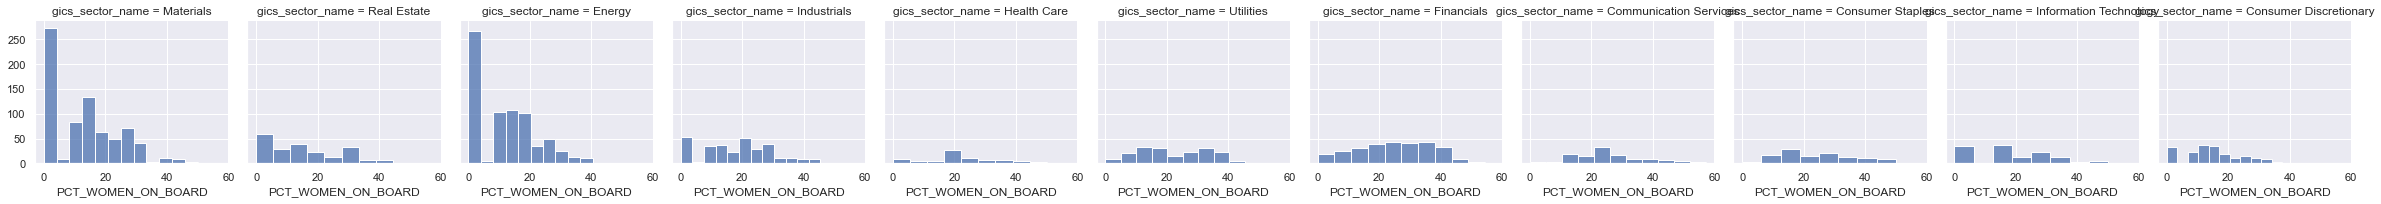

In [776]:
g = sns.FacetGrid(data = df2.reset_index(), col='gics_sector_name',margin_titles=True)
g.map(sns.histplot, 'PCT_WOMEN_ON_BOARD')


In [777]:
# correlations = []
# for year in df2.index.unique(): 
#     correlations.append(df2.loc[year].corr(method = 'spearman'))

# def correlation_plot(correlations):
#     for index,corr in enumerate(correlations):
#         fig, ax = plt.subplots(figsize = (60,30))
#         mask = np.zeros_like(corr)
#         mask[np.triu_indices_from(mask)] = True
#         sns.heatmap(corr, fmt='.2f', 
#                     vmin=corr.values.min(), vmax=1, square=True, cmap=sns.diverging_palette(20, 220, n=200), linewidths=0.1, annot=True, 
#                     annot_kws={"fontsize":14}, cbar=True, mask = mask, ax=ax)
#         ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal",fontdict = {'fontsize': 16})
#         title = str(index + 2010) + ' Correlation Heatmap'
#         ax.set_xticklabels(ax.get_xticklabels(), rotation = 'vertical', fontdict = {'fontsize': 16})
#         ax.set_title(title, fontdict = {'fontsize': 24})
#         cbar = ax.collections[0].colorbar
#         cbar.ax.tick_params(labelsize=20)
#         plt.tight_layout()
#         plt.savefig(f'./{title}.png', bbox_inches='tight', pad_inches=0.0)
# correlation_plot(correlations)


In [778]:
pg.pairwise_corr(method = 'spearman', data = df2.loc['2020'])



X                         Y    method  \
0    BOARD_MEETING_ATTENDANCE_PCT                BOARD_SIZE  spearman   
1    BOARD_MEETING_ATTENDANCE_PCT               CEO_DUALITY  spearman   
2    BOARD_MEETING_ATTENDANCE_PCT               CUR_MKT_CAP  spearman   
3    BOARD_MEETING_ATTENDANCE_PCT  ENVIRON_DISCLOSURE_SCORE  spearman   
4    BOARD_MEETING_ATTENDANCE_PCT       EQY_INST_PCT_SH_OUT  spearman   
..                            ...                       ...       ...   
775    LN_SOCIAL_DISCLOSURE_SCORE                       ROA  spearman   
776    LN_SOCIAL_DISCLOSURE_SCORE                       D/E  spearman   
777                           ROE                       ROA  spearman   
778                           ROE                       D/E  spearman   
779                           ROA                       D/E  spearman   

    alternative    n         r           CI95%         p-unc     power  
0     two-sided  268 -0.042260   [-0.16, 0.08]  4.908902e-01  0.105916  
1     two-sided  268 -0.009417   [-0.13, 0.11]  8.780421e-01  0.052645  
2     two-sided  268  0.084120    [-0.04, 0.2]  1.697212e-01  0.279600  
3     two-sided  247  0.097268   [-0.03, 0.22]  1.273696e-01  0.332668  
4     two-sided  268 -0.012069   [-0.13, 0.11]  8.440942e-01  0.054387  
..          ...  ...       ...             ...           ...       ...  
775   two-sided  271  0.066264   [-0.05, 0.18]  2.770358e-01  0.192733  
776   two-sided  271  0.026844   [-0.09, 0.15]  6.599813e-01  0.072422  
777   two-sided  273  0.818883    [0.78, 0.85]  2.679576e-67  1.000000  
778   two-sided  273 -0.082661    [-0.2, 0.04]  1.732471e-01  0.275827  
779   two-sided  273 -0.164421  [-0.28, -0.05]  6.473672e-03  0.779637  

[780 rows x 9 columns]

In [779]:

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=22,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax
# writer = pd.ExcelWriter('Pairwise Correlations.xlsx',engine = 'xlsxwriter')
# for index,year in enumerate(df2.index.unique()):
#     title = str(2010 +index) + ' Correlation Table'
#     correl = pg.pairwise_corr(method = 'spearman', data = df2.loc[year]).sort_values(by=['p-unc']).to_excel(writer, sheet_name = title, index = False)
# correl = pg.pairwise_corr(method = 'spearman', data = df2).sort_values(by=['p-unc']).to_excel(writer, sheet_name = '2010-2020 Correlation Table', index = False)


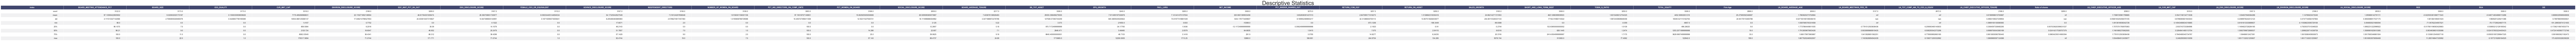

In [780]:
fig, ax = render_mpl_table(df2.describe().reset_index().rename({'index':'Categories'}), header_columns=0, col_width=10, font_size=16)
title = 'Descriptive Statistics'
ax.set_title(title, fontdict={'fontsize': 50})
fig.savefig(f"{title}.png")

In [781]:
women_per_year = df2.groupby(['gics_sector_name','Date'])[['NUMBER_OF_WOMEN_ON_BOARD']].sum().reset_index().pivot(index= 'gics_sector_name', columns= 'Date', values = 'NUMBER_OF_WOMEN_ON_BOARD').reset_index()
women_per_year['Average'] = women_per_year.mean(axis = 1).round(1)
fig, ax = render_mpl_table(women_per_year, header_columns=0, col_width=10, font_size=32)
title = 'Annual Number of Female Directors on Boards in Each Sector'
ax.set_title(title, fontdict={'fontsize': 50})
fig.savefig(f"{title}.png")

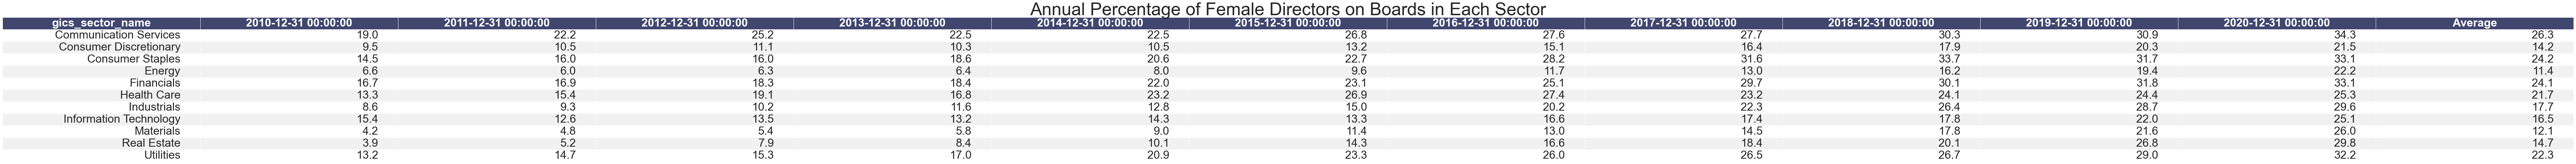

In [782]:
pct_women_per_year = df2.groupby(['gics_sector_name','Date'])[['PCT_WOMEN_ON_BOARD']].mean().round(1).reset_index().pivot(index= 'gics_sector_name', columns= 'Date', values = 'PCT_WOMEN_ON_BOARD').reset_index()
pct_women_per_year['Average'] = pct_women_per_year.mean(axis = 1).round(1)
fig2, ax2 = render_mpl_table(pct_women_per_year, header_columns=0, col_width=10, font_size=32)
title = 'Annual Percentage of Female Directors on Boards in Each Sector'
ax2.set_title(title, fontdict={'fontsize': 50})
fig2.savefig(f"{title}.png")

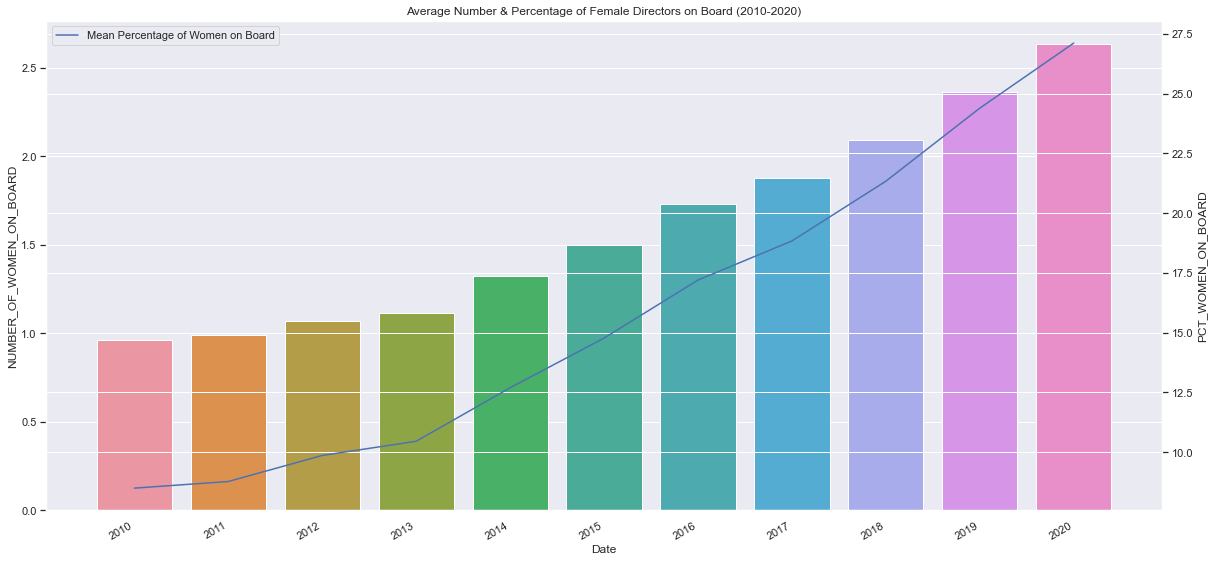

In [783]:
fig, ax = plt.subplots(figsize = (20,10))
mean_women_on_board = df2.groupby('Date')[['NUMBER_OF_WOMEN_ON_BOARD']].mean().reset_index()
mean_women_on_board
sns.barplot(x = 'Date', y ='NUMBER_OF_WOMEN_ON_BOARD' ,data = mean_women_on_board, ax = ax)
mean_pct_women_on_board = df2.groupby('Date')[['PCT_WOMEN_ON_BOARD']].mean().reset_index()
fig.autofmt_xdate()
mean_women_on_board.set_index('Date', inplace=True)
mean_pct_women_on_board.set_index('Date',inplace = True)
ticklabels = mean_women_on_board.index.strftime('%Y')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
title = 'Average Number & Percentage of Female Directors on Board (2010-2020)'
ax.set_title(title)
ax2 = ax.twinx()
mean_pct_women_on_board.index = mean_pct_women_on_board.index.strftime('%Y')
sns.lineplot(data = mean_pct_women_on_board, x = 'Date', y = 'PCT_WOMEN_ON_BOARD', ax = ax2, label = 'Mean Percentage of Women on Board')
fig.savefig(f"{title}.png")





In [784]:
df2.index = pd.DatetimeIndex(df2.index)


In [785]:
df2.index = df2.index.strftime('%Y')

In [786]:
## create reg variable 1 if year >2015 and 0 if <2015
def reg_column(row):
    if int(row) >= 2015:
        return 1
    else:
        return 0
df2 = df2.reset_index()
df2['REG'] = df2.Date.apply(lambda row: reg_column(row))

In [787]:
df2.set_index('Date', inplace = True)


In [886]:
df2.columns

Index(['Ticker', 'BOARD_MEETING_ATTENDANCE_PCT', 'BOARD_SIZE', 'CEO_DUALITY',
       'CUR_MKT_CAP', 'ENVIRON_DISCLOSURE_SCORE', 'EQY_INST_PCT_SH_OUT',
       'ESG_DISCLOSURE_SCORE', 'FEMALE_CEO_OR_EQUIVALENT',
       'GOVNCE_DISCLOSURE_SCORE', 'INDEPENDENT_DIRECTORS',
       'NUMBER_OF_WOMEN_ON_BOARD', 'PCT_IND_DIRECTORS_ON_COMP_CMTE',
       'PCT_WOMEN_ON_BOARD', 'SOCIAL_DISCLOSURE_SCORE', 'BOARD_AVERAGE_TENURE',
       'BS_TOT_ASSET', 'EPS_GROWTH', 'FNCL_LVRG', 'NET_INCOME',
       'PCT_INSIDER_SHARES_OUT', 'RETURN_COM_EQY', 'RETURN_ON_ASSET',
       'SALES_GROWTH', 'SHORT_AND_LONG_TERM_DEBT', 'TOBIN_Q_RATIO',
       'TOTAL_EQUITY', 'security_name', 'gics_sector_name', 'Firm Age',
       'LN_BOARD_AVERAGE_AGE', 'LN_BOARD_MEETINGS_PER_YR',
       'LN_TOT_COMP_AW_TO_CEO_&_EQUIV', 'LN_CHIEF_EXECUTIVE_OFFICER_TENURE',
       'Ratio of shares', 'LN_CHIEF_EXECUTIVE_OFFICER_AGE', 'LN_CUR_MKT_CAP',
       'LN_ESG_DISCLOSURE_SCORE', 'LN_ENVIRON_DISCLOSURE_SCORE',
       'LN_SOCIAL_DISCLOSURE_

In [914]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df2[['BOARD_SIZE','CEO_DUALITY','BOARD_AVERAGE_TENURE','BOARD_MEETING_ATTENDANCE_PCT','LN_BOARD_AVERAGE_AGE',
              'LN_BOARD_MEETINGS_PER_YR','PCT_WOMEN_ON_BOARD','LN_CHIEF_EXECUTIVE_OFFICER_AGE','LN_CHIEF_EXECUTIVE_OFFICER_TENURE','INDEPENDENT_DIRECTORS'
,'ROE','LN_CUR_MKT_CAP','ROA','D/E','LN_ESG_DISCLOSURE_SCORE']]
x = x[~x.isin([np.nan, np.inf, -np.inf]).any(1)]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data.sort_values(by= 'VIF')
  


feature          VIF
13                                D/E     1.124724
1                         CEO_DUALITY     1.294425
12                                ROA     1.733854
10                                ROE     1.783226
8   LN_CHIEF_EXECUTIVE_OFFICER_TENURE     3.428656
6                  PCT_WOMEN_ON_BOARD     5.244023
2                BOARD_AVERAGE_TENURE     8.389034
5            LN_BOARD_MEETINGS_PER_YR    31.035275
9               INDEPENDENT_DIRECTORS    48.101621
11                     LN_CUR_MKT_CAP    48.505978
14            LN_ESG_DISCLOSURE_SCORE    62.854419
0                          BOARD_SIZE    65.755480
3        BOARD_MEETING_ATTENDANCE_PCT   568.637235
7      LN_CHIEF_EXECUTIVE_OFFICER_AGE  1315.745436
4                LN_BOARD_AVERAGE_AGE  1918.909725

In [789]:
panel_data = df2
panel_data = panel_data.reset_index()


In [790]:
panel_data
panel_data.Date = panel_data.Date.astype(str).astype(int)
panel_data = panel_data.set_index(['Ticker','Date'])

In [791]:

from linearmodels.panel import PooledOLS
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
exog = sm.tools.tools.add_constant(panel_data['PCT_WOMEN_ON_BOARD'])
endog = panel_data['LN_ESG_DISCLOSURE_SCORE']
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids



In [792]:
pooledOLS_res

PooledOLS Estimation Summary                            
=====================================================================================
Dep. Variable:     LN_ESG_DISCLOSURE_SCORE   R-squared:                        0.1942
Estimator:                       PooledOLS   R-squared (Between):              0.1748
No. Observations:                     3162   R-squared (Within):               0.2659
Date:                     Mon, Sep 06 2021   R-squared (Overall):              0.1942
Time:                             01:32:13   Log-likelihood                    380.30
Cov. Estimator:                  Clustered                                           
                                             F-statistic:                      761.55
Entities:                              351   P-value                           0.0000
Avg Obs:                            9.0085   Distribution:                  F(1,3160)
Min Obs:                            2.0000                                           
Max Obs:                            11.000   F-statistic (robust):             162.14
                                             P-value                           0.0000
Time periods:                           11   Distribution:                  F(1,3160)
Avg Obs:                            287.45                                           
Min Obs:                            260.00                                           
Max Obs:                            300.00                                           
                                                                                     
                                 Parameter Estimates                                  
======================================================================================
                    Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------
const                  1.2223     0.0132     92.942     0.0000      1.1965      1.2481
PCT_WOMEN_ON_BOARD     0.0084     0.0007     12.733     0.0000      0.0071      0.0097
======================================================================================
PanelResults, id: 0x1bf5a6c1ac0

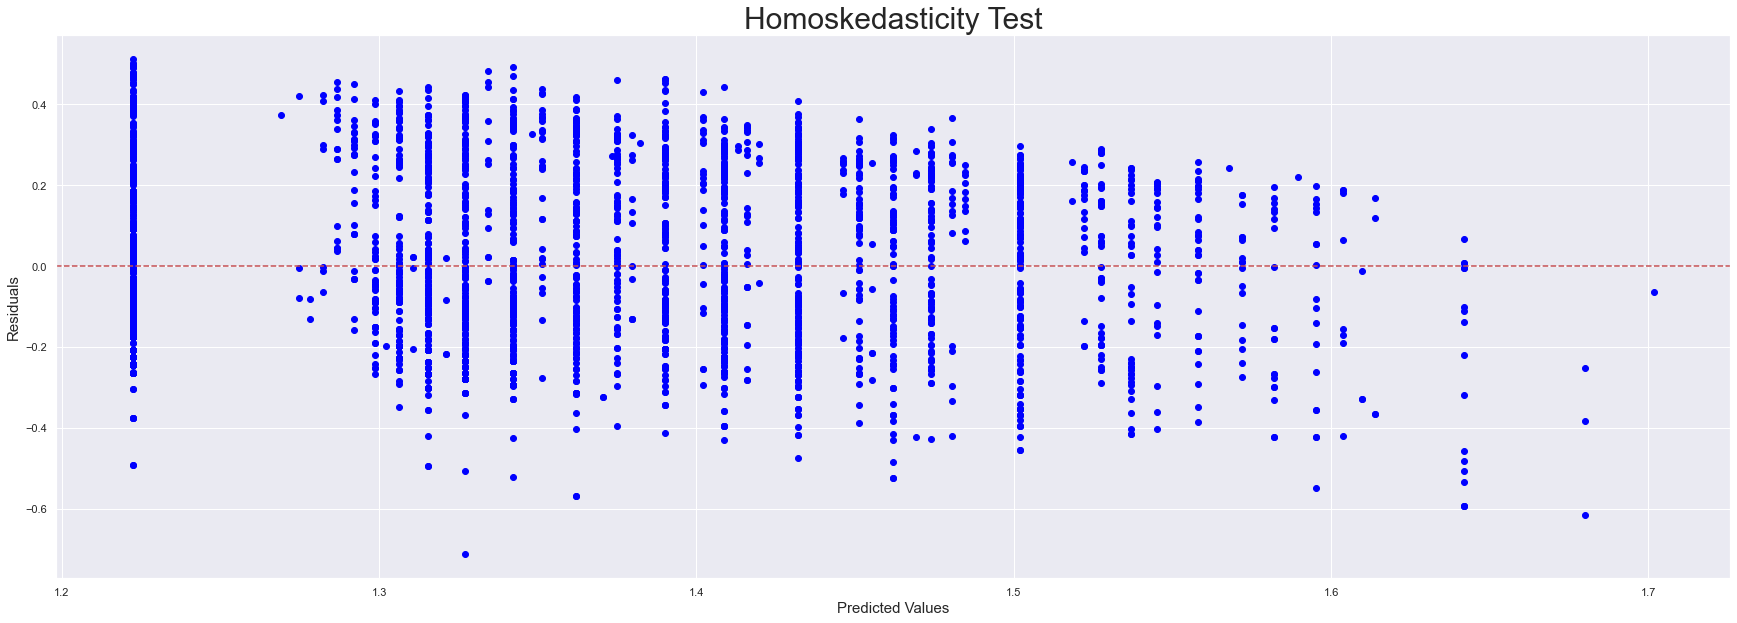

In [793]:
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots(figsize = (30,10))
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [794]:
# 3A.2 White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([panel_data, residuals_pooled_OLS], axis=1).reset_index()
pooled_OLS_dataset = pooled_OLS_dataset.drop(['Date'], axis = 1).fillna(0)
pooled_OLS_dataset
exog = sm.tools.tools.add_constant(panel_data['PCT_WOMEN_ON_BOARD']).fillna(0)
white_test_results = het_white(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
#3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset.residual,exog)
print(dict(zip(labels, breusch_pagan_test_results)))
## no heteroskedacity

{'LM-Stat': 7.25027539917957, 'LM p-val': 0.02664542801922166, 'F-Stat': 3.629794393164559, 'F p-val': 0.02662716584416535}
{'LM-Stat': 5.439250667515003, 'LM p-val': 0.01968911447885108, 'F-Stat': 5.444901355693008, 'F p-val': 0.019685034882447744}


In [795]:
from statsmodels.stats.stattools import durbin_watson
## Clear positive autocorrelation
durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

0.35741321955618527


In [796]:
# fixed effects model
model_fe = PanelOLS(endog, exog, entity_effects = True,time_effects=True) 
fe_res = model_fe.fit(cov_type = 'clustered',cluster_entity = True) 
#print results
fe_res

PanelOLS Estimation Summary                             
=====================================================================================
Dep. Variable:     LN_ESG_DISCLOSURE_SCORE   R-squared:                        0.0056
Estimator:                        PanelOLS   R-squared (Between):              0.0367
No. Observations:                     3167   R-squared (Within):               0.0752
Date:                     Mon, Sep 06 2021   R-squared (Overall):              0.0531
Time:                             01:32:14   Log-likelihood                    2959.6
Cov. Estimator:                  Clustered                                           
                                             F-statistic:                      15.869
Entities:                              352   P-value                           0.0001
Avg Obs:                            8.9972   Distribution:                  F(1,2804)
Min Obs:                            2.0000                                           
Max Obs:                            11.000   F-statistic (robust):             4.4586
                                             P-value                           0.0348
Time periods:                           11   Distribution:                  F(1,2804)
Avg Obs:                            287.91                                           
Min Obs:                            260.00                                           
Max Obs:                            301.00                                           
                                                                                     
                                 Parameter Estimates                                  
======================================================================================
                    Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------
const                  1.3352     0.0092     144.76     0.0000      1.3171      1.3532
PCT_WOMEN_ON_BOARD     0.0012     0.0006     2.1115     0.0348   8.809e-05      0.0024
======================================================================================

F-test for Poolability: 31.762
P-value: 0.0000
Distribution: F(361,2804)

Included effects: Entity, Time
PanelEffectsResults, id: 0x1bf5ad95340

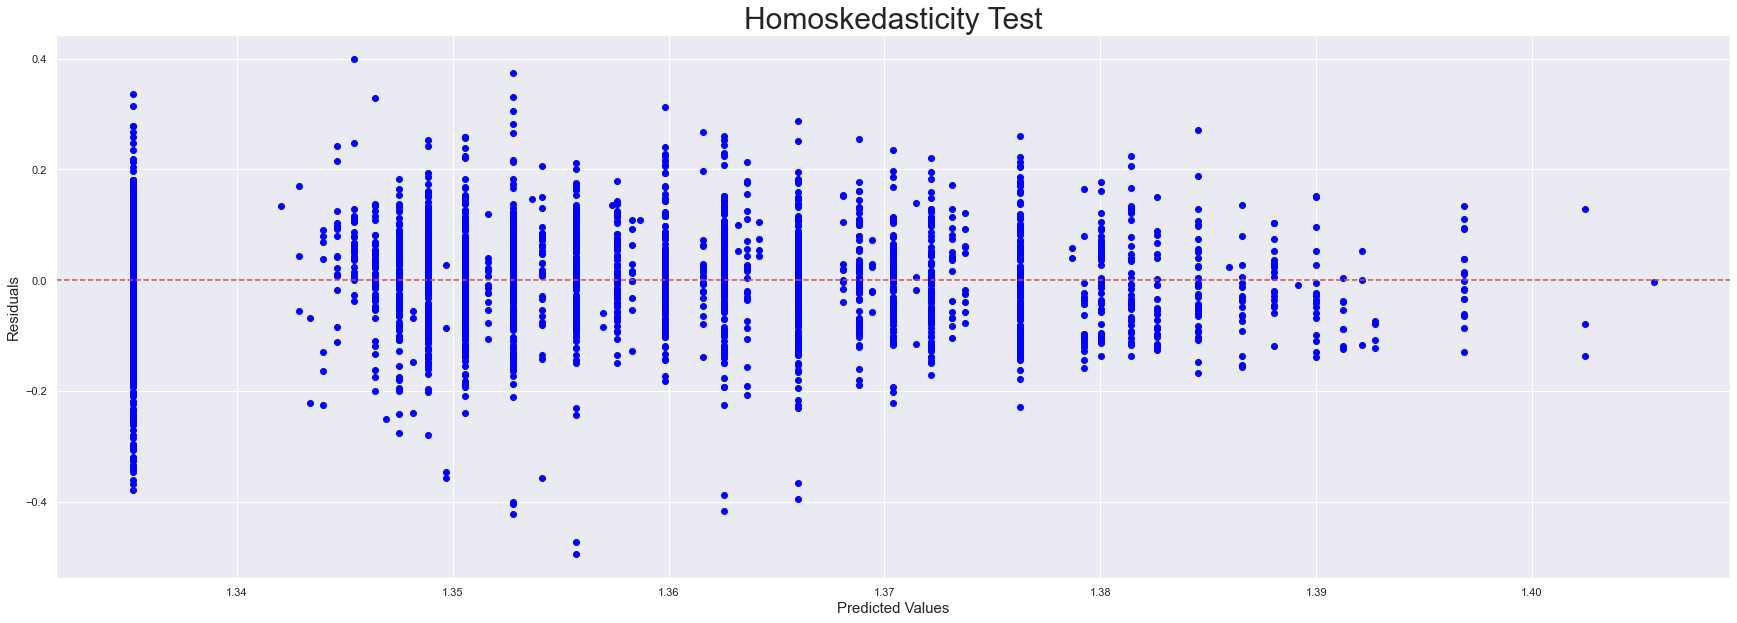

In [797]:
# Store values for checking homoskedasticity graphically
fittedvals_fe_OLS = fe_res.predict().fitted_values
residuals_fe_OLS = fe_res.resids
fig, ax = plt.subplots(figsize = (30,10))
ax.scatter(fittedvals_fe_OLS, residuals_fe_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()


In [798]:
fe_OLS_dataset = pd.concat([panel_data, residuals_fe_OLS], axis=1).reset_index()
fe_OLS_dataset = fe_OLS_dataset.drop(['Date'], axis = 1).fillna(0)
fe_OLS_dataset
exog = sm.tools.tools.add_constant(panel_data['PCT_WOMEN_ON_BOARD']).fillna(0)
white_test_results = het_white(fe_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
#3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(fe_OLS_dataset.residual,exog)
print(dict(zip(labels, breusch_pagan_test_results)))
## no heteroskedacity

{'LM-Stat': 1.4990398051405514, 'LM p-val': 0.47259338915630633, 'F-Stat': 0.7491804850976805, 'F p-val': 0.4728338969946486}
{'LM-Stat': 0.8223170265651372, 'LM p-val': 0.3645035915817263, 'F-Stat': 0.8220249068496949, 'F p-val': 0.36465471152996054}


In [799]:
## Clear positive autocorrelation but less than before
durbin_watson_test_results = durbin_watson(fe_OLS_dataset['residual']) 
print(durbin_watson_test_results)

0.8471953587285639


In [800]:
panel_data.columns

Index(['BOARD_MEETING_ATTENDANCE_PCT', 'BOARD_SIZE', 'CEO_DUALITY',
       'CUR_MKT_CAP', 'ENVIRON_DISCLOSURE_SCORE', 'EQY_INST_PCT_SH_OUT',
       'ESG_DISCLOSURE_SCORE', 'FEMALE_CEO_OR_EQUIVALENT',
       'GOVNCE_DISCLOSURE_SCORE', 'INDEPENDENT_DIRECTORS',
       'NUMBER_OF_WOMEN_ON_BOARD', 'PCT_IND_DIRECTORS_ON_COMP_CMTE',
       'PCT_WOMEN_ON_BOARD', 'SOCIAL_DISCLOSURE_SCORE', 'BOARD_AVERAGE_TENURE',
       'BS_TOT_ASSET', 'EPS_GROWTH', 'FNCL_LVRG', 'NET_INCOME',
       'PCT_INSIDER_SHARES_OUT', 'RETURN_COM_EQY', 'RETURN_ON_ASSET',
       'SALES_GROWTH', 'SHORT_AND_LONG_TERM_DEBT', 'TOBIN_Q_RATIO',
       'TOTAL_EQUITY', 'security_name', 'gics_sector_name', 'Firm Age',
       'LN_BOARD_AVERAGE_AGE', 'LN_BOARD_MEETINGS_PER_YR',
       'LN_TOT_COMP_AW_TO_CEO_&_EQUIV', 'LN_CHIEF_EXECUTIVE_OFFICER_TENURE',
       'Ratio of shares', 'LN_CHIEF_EXECUTIVE_OFFICER_AGE', 'LN_CUR_MKT_CAP',
       'LN_ESG_DISCLOSURE_SCORE', 'LN_ENVIRON_DISCLOSURE_SCORE',
       'LN_SOCIAL_DISCLOSURE_SCORE', 'R

In [801]:
exog_vars = ['BOARD_SIZE','CEO_DUALITY','BOARD_AVERAGE_TENURE','BOARD_MEETING_ATTENDANCE_PCT','LN_BOARD_AVERAGE_AGE',
             'LN_BOARD_MEETINGS_PER_YR','PCT_WOMEN_ON_BOARD','LN_CHIEF_EXECUTIVE_OFFICER_AGE','LN_CHIEF_EXECUTIVE_OFFICER_TENURE','INDEPENDENT_DIRECTORS']
exog = sm.tools.tools.add_constant(panel_data[exog_vars])
endog = panel_data['LN_ESG_DISCLOSURE_SCORE']
mod = PanelOLS(endog, exog, entity_effects=True)
PanelOLS2_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_fe2_OLS = PanelOLS2_res.predict().fitted_values
residuals_fe2_OLS = PanelOLS2_res.resids



In [802]:
PanelOLS2_res

PanelOLS Estimation Summary                             
=====================================================================================
Dep. Variable:     LN_ESG_DISCLOSURE_SCORE   R-squared:                        0.2612
Estimator:                        PanelOLS   R-squared (Between):              0.1702
No. Observations:                     1754   R-squared (Within):               0.2612
Date:                     Mon, Sep 06 2021   R-squared (Overall):              0.2016
Time:                             01:32:15   Log-likelihood                    1819.7
Cov. Estimator:                  Clustered                                           
                                             F-statistic:                      52.140
Entities:                              269   P-value                           0.0000
Avg Obs:                            6.5204   Distribution:                 F(10,1475)
Min Obs:                            1.0000                                           
Max Obs:                            8.0000   F-statistic (robust):             20.610
                                             P-value                           0.0000
Time periods:                           11   Distribution:                 F(10,1475)
Avg Obs:                            159.45                                           
Min Obs:                            1.0000                                           
Max Obs:                            242.00                                           
                                                                                     
                                         Parameter Estimates                                         
=====================================================================================================
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
const                                -1.5580     0.4637    -3.3599     0.0008     -2.4676     -0.6484
BOARD_SIZE                            0.0111     0.0077     1.4476     0.1479     -0.0039      0.0261
CEO_DUALITY                          -0.0406     0.0293    -1.3852     0.1662     -0.0982      0.0169
BOARD_AVERAGE_TENURE                  0.0012     0.0035     0.3272     0.7435     -0.0057      0.0080
BOARD_MEETING_ATTENDANCE_PCT          0.0017     0.0011     1.6428     0.1006     -0.0003      0.0038
LN_BOARD_AVERAGE_AGE                  1.1119     0.2665     4.1717     0.0000      0.5891      1.6348
LN_BOARD_MEETINGS_PER_YR              0.0062     0.0235     0.2640     0.7918     -0.0399      0.0523
PCT_WOMEN_ON_BOARD                    0.0056     0.0005     10.721     0.0000      0.0046      0.0066
LN_CHIEF_EXECUTIVE_OFFICER_AGE        0.3486     0.1454     2.3977     0.0166      0.0634      0.6337
LN_CHIEF_EXECUTIVE_OFFICER_TENURE    -0.0133     0.0103    -1.2875     0.1981     -0.0336      0.0070
INDEPENDENT_DIRECTORS                 0.0010     0.0069     0.1405     0.8883     -0.0126      0.0145
=====================================================================================================

F-test for Poolability: 21.674
P-value: 0.0000
Distribution: F(268,1475)

Included effects: Entity
PanelEffectsResults, id: 0x1bf55980d60

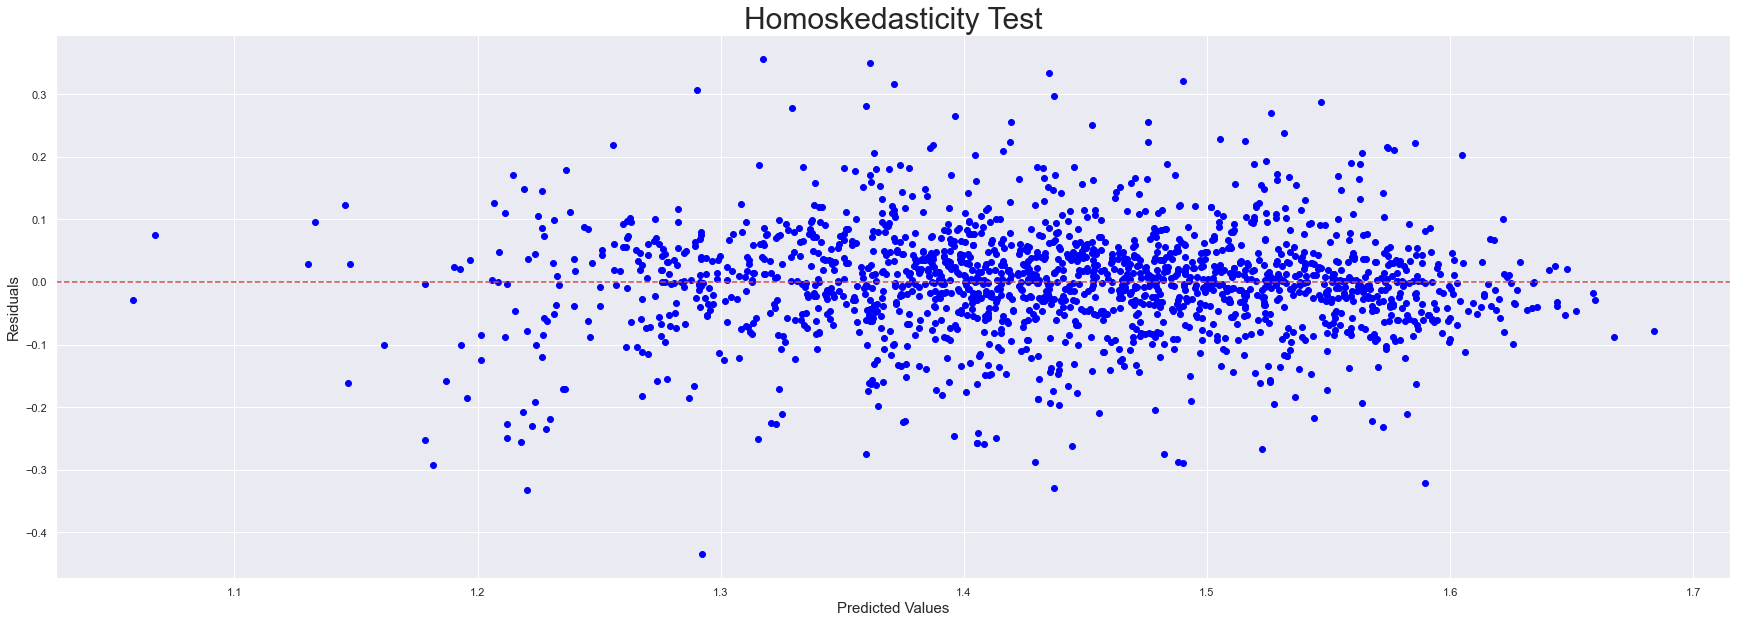

In [803]:

fig, ax = plt.subplots(figsize = (30,10))
ax.scatter(fittedvals_fe2_OLS, residuals_fe2_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [804]:
fe2_OLS_dataset = pd.concat([panel_data, residuals_fe2_OLS], axis=1).reset_index()
fe2_OLS_dataset = fe2_OLS_dataset.drop(['Date'], axis = 1).fillna(0)
fe2_OLS_dataset
exog = sm.tools.tools.add_constant(panel_data['PCT_WOMEN_ON_BOARD']).fillna(0)
white_test_results = het_white(fe2_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
#3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(fe2_OLS_dataset.residual,exog)
print(dict(zip(labels, breusch_pagan_test_results)))
## no heteroskedacity

{'LM-Stat': 0.6329534240830048, 'LM p-val': 0.7287119815765688, 'F-Stat': 0.3162507596485864, 'F p-val': 0.7288986556305631}
{'LM-Stat': 0.34774361880974425, 'LM p-val': 0.5553932002171402, 'F-Stat': 0.34757033115220454, 'F p-val': 0.5555319282498712}


In [805]:
durbin_watson_test_results = durbin_watson(fe2_OLS_dataset['residual']) 
print(durbin_watson_test_results)

1.1585116785891507


In [806]:
exog_vars = ['BOARD_SIZE','CEO_DUALITY','BOARD_AVERAGE_TENURE','BOARD_MEETING_ATTENDANCE_PCT','LN_BOARD_AVERAGE_AGE',
              'LN_BOARD_MEETINGS_PER_YR','PCT_WOMEN_ON_BOARD','LN_CHIEF_EXECUTIVE_OFFICER_AGE','LN_CHIEF_EXECUTIVE_OFFICER_TENURE','INDEPENDENT_DIRECTORS'
,'ROE','LN_CUR_MKT_CAP','ROA','D/E']
exog = sm.tools.tools.add_constant(panel_data[exog_vars])
endog = panel_data['LN_ESG_DISCLOSURE_SCORE']
mod = PanelOLS(endog, exog, entity_effects=True)
PanelOLS3_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_fe3_OLS = PanelOLS3_res.predict().fitted_values
residuals_fe3_OLS = PanelOLS3_res.resids


In [807]:
PanelOLS3_res

PanelOLS Estimation Summary                             
=====================================================================================
Dep. Variable:     LN_ESG_DISCLOSURE_SCORE   R-squared:                        0.2645
Estimator:                        PanelOLS   R-squared (Between):              0.2175
No. Observations:                     1754   R-squared (Within):               0.2645
Date:                     Mon, Sep 06 2021   R-squared (Overall):              0.2364
Time:                             01:32:16   Log-likelihood                    1823.7
Cov. Estimator:                  Clustered                                           
                                             F-statistic:                      37.793
Entities:                              269   P-value                           0.0000
Avg Obs:                            6.5204   Distribution:                 F(14,1471)
Min Obs:                            1.0000                                           
Max Obs:                            8.0000   F-statistic (robust):             14.705
                                             P-value                           0.0000
Time periods:                           11   Distribution:                 F(14,1471)
Avg Obs:                            159.45                                           
Min Obs:                            1.0000                                           
Max Obs:                            242.00                                           
                                                                                     
                                         Parameter Estimates                                         
=====================================================================================================
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
const                                -1.6911     0.4666    -3.6242     0.0003     -2.6064     -0.7758
BOARD_SIZE                            0.0107     0.0077     1.3939     0.1635     -0.0044      0.0257
CEO_DUALITY                          -0.0400     0.0291    -1.3740     0.1697     -0.0971      0.0171
BOARD_AVERAGE_TENURE                  0.0005     0.0034     0.1540     0.8776     -0.0062      0.0073
BOARD_MEETING_ATTENDANCE_PCT          0.0017     0.0011     1.6385     0.1015     -0.0003      0.0038
LN_BOARD_AVERAGE_AGE                  1.1273     0.2652     4.2507     0.0000      0.6071      1.6475
LN_BOARD_MEETINGS_PER_YR              0.0071     0.0239     0.2957     0.7675     -0.0398      0.0539
PCT_WOMEN_ON_BOARD                    0.0055     0.0005     10.633     0.0000      0.0045      0.0065
LN_CHIEF_EXECUTIVE_OFFICER_AGE        0.3582     0.1477     2.4254     0.0154      0.0685      0.6479
LN_CHIEF_EXECUTIVE_OFFICER_TENURE    -0.0145     0.0104    -1.3939     0.1636     -0.0348      0.0059
INDEPENDENT_DIRECTORS                 0.0008     0.0069     0.1137     0.9095     -0.0128      0.0144
ROE                                1.893e-05     0.0010     0.0184     0.9853     -0.0020      0.0020
LN_CUR_MKT_CAP                        0.0286     0.0191     1.4997     0.1339     -0.0088      0.0661
ROA                                  -0.0040     0.0054    -0.7308     0.4650     -0.0147      0.0067
D/E                                   0.0002     0.0001     1.2685     0.2048  -9.406e-05      0.0004
=====================================================================================================

F-test for Poolability: 19.764
P-value: 0.0000
Distribution: F(268,1471)

Included effects: Entity
PanelEffectsResults, id: 0x1bf5556d4c0

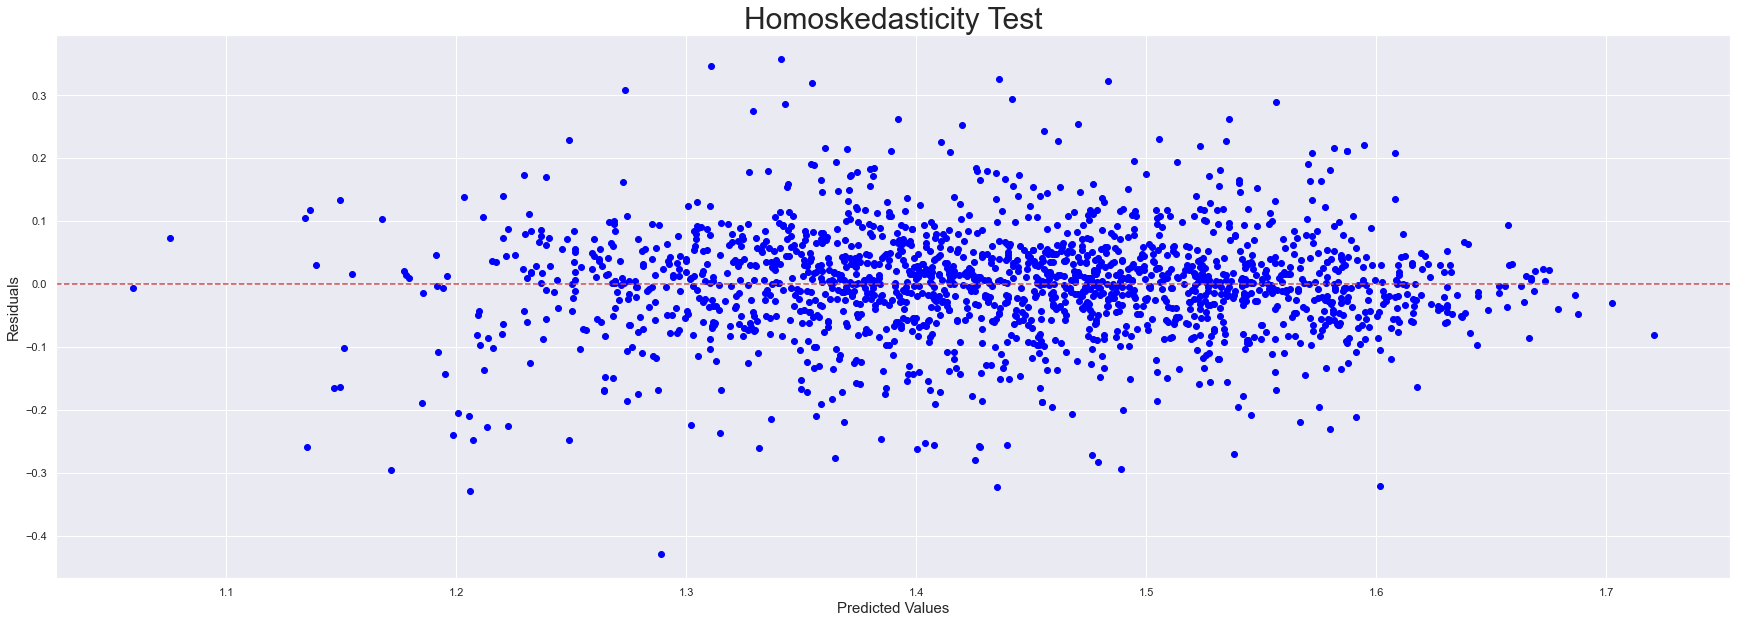

In [808]:
fig, ax = plt.subplots(figsize = (30,10))
ax.scatter(fittedvals_fe3_OLS, residuals_fe3_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [809]:
fe3_OLS_dataset = pd.concat([panel_data, residuals_fe3_OLS], axis=1).reset_index()
fe3_OLS_dataset = fe3_OLS_dataset.drop(['Date'], axis = 1).fillna(0)
fe3_OLS_dataset
exog = sm.tools.tools.add_constant(panel_data['PCT_WOMEN_ON_BOARD']).fillna(0)
white_test_results = het_white(fe3_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
#3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(fe3_OLS_dataset.residual,exog)
print(dict(zip(labels, breusch_pagan_test_results)))
## no heteroskedacity

{'LM-Stat': 0.7969007917242359, 'LM p-val': 0.6713595819792639, 'F-Stat': 0.39818560793655694, 'F p-val': 0.671569507123452}
{'LM-Stat': 0.4919803000650962, 'LM p-val': 0.48304526535696146, 'F-Stat': 0.49175652863083885, 'F p-val': 0.48319403892308765}


In [810]:
durbin_watson_test_results = durbin_watson(fe3_OLS_dataset['residual']) 
print(durbin_watson_test_results)

1.1597314769163307


In [811]:
PanelOLS3_res.variance_decomposition

Effects                   0.029516
Residual                  0.007318
Percent due to Effects    0.801323
Name: Variance Decomposition, dtype: float64

In [812]:
industry_dummies = pd.get_dummies(panel_data.gics_sector_name, drop_first = True)
panel_data = pd.concat([panel_data,industry_dummies],axis = 1)
panel_data = panel_data[panel_data['gics_sector_name'].notna()]
# panel_data['gics_sector_name'] = pd.Categorical(panel_data['gics_sector_name'])

In [813]:
## using comm services as BaseLine, regression with industry, board, and financial variables
exog_vars = ['BOARD_SIZE','CEO_DUALITY','BOARD_AVERAGE_TENURE','BOARD_MEETING_ATTENDANCE_PCT','LN_BOARD_AVERAGE_AGE',
              'LN_BOARD_MEETINGS_PER_YR','PCT_WOMEN_ON_BOARD','LN_CHIEF_EXECUTIVE_OFFICER_AGE','LN_CHIEF_EXECUTIVE_OFFICER_TENURE','INDEPENDENT_DIRECTORS'
,'ROE','LN_CUR_MKT_CAP','ROA','D/E','Consumer Discretionary', 'Consumer Staples', 'Energy',
       'Financials', 'Health Care', 'Industrials', 'Information Technology',
       'Materials', 'Real Estate', 'Utilities']
exog = sm.tools.tools.add_constant(panel_data[exog_vars])
endog = panel_data['LN_ESG_DISCLOSURE_SCORE']
mod = PanelOLS(endog, exog)
PanelOLS4_res = mod.fit(cov_type='clustered', cluster_entity = True)
# Store values for checking homoskedasticity graphically
fittedvals_fe4_OLS = PanelOLS4_res.predict().fitted_values
residuals_fe4_OLS = PanelOLS4_res.resids

In [814]:
PanelOLS4_res.variance_decomposition

Effects                   0.000000
Residual                  0.025963
Percent due to Effects    0.000000
Name: Variance Decomposition, dtype: float64

In [815]:
PanelOLS4_res

PanelOLS Estimation Summary                             
=====================================================================================
Dep. Variable:     LN_ESG_DISCLOSURE_SCORE   R-squared:                        0.4617
Estimator:                        PanelOLS   R-squared (Between):              0.5294
No. Observations:                     1754   R-squared (Within):               0.1793
Date:                     Mon, Sep 06 2021   R-squared (Overall):              0.4617
Time:                             01:32:17   Log-likelihood                    713.18
Cov. Estimator:                  Clustered                                           
                                             F-statistic:                      61.801
Entities:                              269   P-value                           0.0000
Avg Obs:                            6.5204   Distribution:                 F(24,1729)
Min Obs:                            1.0000                                           
Max Obs:                            8.0000   F-statistic (robust):             30.025
                                             P-value                           0.0000
Time periods:                           11   Distribution:                 F(24,1729)
Avg Obs:                            159.45                                           
Min Obs:                            1.0000                                           
Max Obs:                            242.00                                           
                                                                                     
                                         Parameter Estimates                                         
=====================================================================================================
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
const                                 0.4919     0.5504     0.8937     0.3716     -0.5876      1.5714
BOARD_SIZE                            0.0156     0.0067     2.3184     0.0205      0.0024      0.0287
CEO_DUALITY                          -0.0169     0.0263    -0.6427     0.5205     -0.0685      0.0347
BOARD_AVERAGE_TENURE                 -0.0004     0.0029    -0.1459     0.8840     -0.0061      0.0053
BOARD_MEETING_ATTENDANCE_PCT          0.0015     0.0014     1.0568     0.2907     -0.0013      0.0042
LN_BOARD_AVERAGE_AGE                 -0.3495     0.3195    -1.0937     0.2742     -0.9761      0.2772
LN_BOARD_MEETINGS_PER_YR              0.0005     0.0395     0.0135     0.9892     -0.0769      0.0779
PCT_WOMEN_ON_BOARD                    0.0059     0.0006     9.6071     0.0000      0.0047      0.0072
LN_CHIEF_EXECUTIVE_OFFICER_AGE        0.3561     0.1521     2.3415     0.0193      0.0578      0.6543
LN_CHIEF_EXECUTIVE_OFFICER_TENURE    -0.0084     0.0129    -0.6523     0.5143     -0.0336      0.0168
INDEPENDENT_DIRECTORS                 0.0034     0.0069     0.4937     0.6216     -0.0102      0.0170
ROE                                  -0.0009     0.0026    -0.3473     0.7284     -0.0061      0.0042
LN_CUR_MKT_CAP                        0.1229     0.0144     8.5287     0.0000      0.0946      0.1511
ROA                                  -0.0243     0.0103    -2.3631     0.0182     -0.0444     -0.0041
D/E                                   0.0002     0.0006     0.3006     0.7638     -0.0011      0.0015
Consumer Discretionary                0.0403     0.0523     0.7717     0.4404     -0.0622      0.1429
Consumer Staples                     -0.0538     0.0536    -1.0044     0.3153     -0.1590      0.0513
Energy                                0.1629     0.0477     3.4161     0.0007      0.0694      0.2564
Financials                           -0.0423     0.0498    -0.8487     0.3962     -0.1400      0.0554
Health Care                          -0.1240     

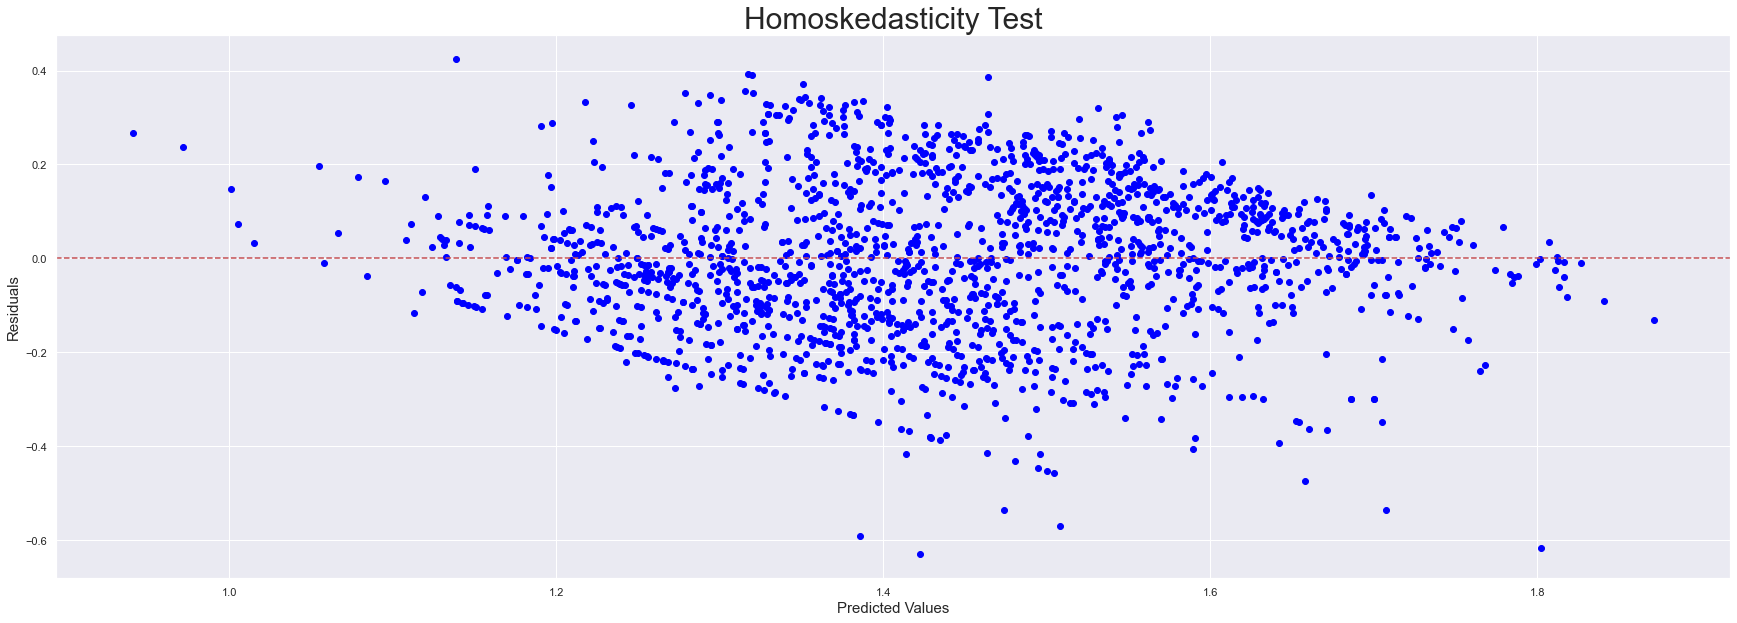

In [816]:
fig, ax = plt.subplots(figsize = (30,10))
ax.scatter(fittedvals_fe4_OLS, residuals_fe4_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [817]:
fe4_OLS_dataset = pd.concat([panel_data, residuals_fe4_OLS], axis=1).reset_index()
fe4_OLS_dataset = fe4_OLS_dataset.drop(['Date'], axis = 1).fillna(0)
fe4_OLS_dataset
exog = sm.tools.tools.add_constant(panel_data['PCT_WOMEN_ON_BOARD']).fillna(0)
white_test_results = het_white(fe4_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
#3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(fe4_OLS_dataset.residual,exog)
print(dict(zip(labels, breusch_pagan_test_results)))
## no heteroskedacity

{'LM-Stat': 0.5037540391150852, 'LM p-val': 0.7773403298485707, 'F-Stat': 0.2516814830230392, 'F p-val': 0.7775076697810626}
{'LM-Stat': 0.4861344142421231, 'LM p-val': 0.4856567397193968, 'F-Stat': 0.4859055419092882, 'F p-val': 0.4858098711382328}


In [818]:
durbin_watson_test_results = durbin_watson(fe4_OLS_dataset['residual']) 
print(durbin_watson_test_results)

0.6013448123922825


In [819]:
## using comm services as BaseLine


In [820]:
## using comm services as BaseLine, regression with BGD, REG variable
exog_vars = ['PCT_WOMEN_ON_BOARD','REG']
exog = sm.tools.tools.add_constant(panel_data[exog_vars])
endog = panel_data['LN_ESG_DISCLOSURE_SCORE']
mod = PanelOLS(endog, exog,entity_effects = True)
PanelOLS5_res = mod.fit(cov_type='clustered', cluster_entity = True)
# Store values for checking homoskedasticity graphically
fittedvals_fe5_OLS = PanelOLS5_res.predict().fitted_values
residuals_fe5_OLS = PanelOLS5_res.resids

In [821]:
PanelOLS5_res

PanelOLS Estimation Summary                             
=====================================================================================
Dep. Variable:     LN_ESG_DISCLOSURE_SCORE   R-squared:                        0.3720
Estimator:                        PanelOLS   R-squared (Between):              0.1046
No. Observations:                     3066   R-squared (Within):               0.3720
Date:                     Mon, Sep 06 2021   R-squared (Overall):              0.1882
Time:                             01:32:17   Log-likelihood                    2593.8
Cov. Estimator:                  Clustered                                           
                                             F-statistic:                      812.50
Entities:                              321   P-value                           0.0000
Avg Obs:                            9.5514   Distribution:                  F(2,2743)
Min Obs:                            2.0000                                           
Max Obs:                            11.000   F-statistic (robust):             171.63
                                             P-value                           0.0000
Time periods:                           11   Distribution:                  F(2,2743)
Avg Obs:                            278.73                                           
Min Obs:                            230.00                                           
Max Obs:                            300.00                                           
                                                                                     
                                 Parameter Estimates                                  
======================================================================================
                    Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------
const                  1.2269     0.0078     156.41     0.0000      1.2115      1.2422
PCT_WOMEN_ON_BOARD     0.0043     0.0005     8.5270     0.0000      0.0033      0.0053
REG                    0.1109     0.0093     11.956     0.0000      0.0927      0.1291
======================================================================================

F-test for Poolability: 27.415
P-value: 0.0000
Distribution: F(320,2743)

Included effects: Entity
PanelEffectsResults, id: 0x1bf5ea52280

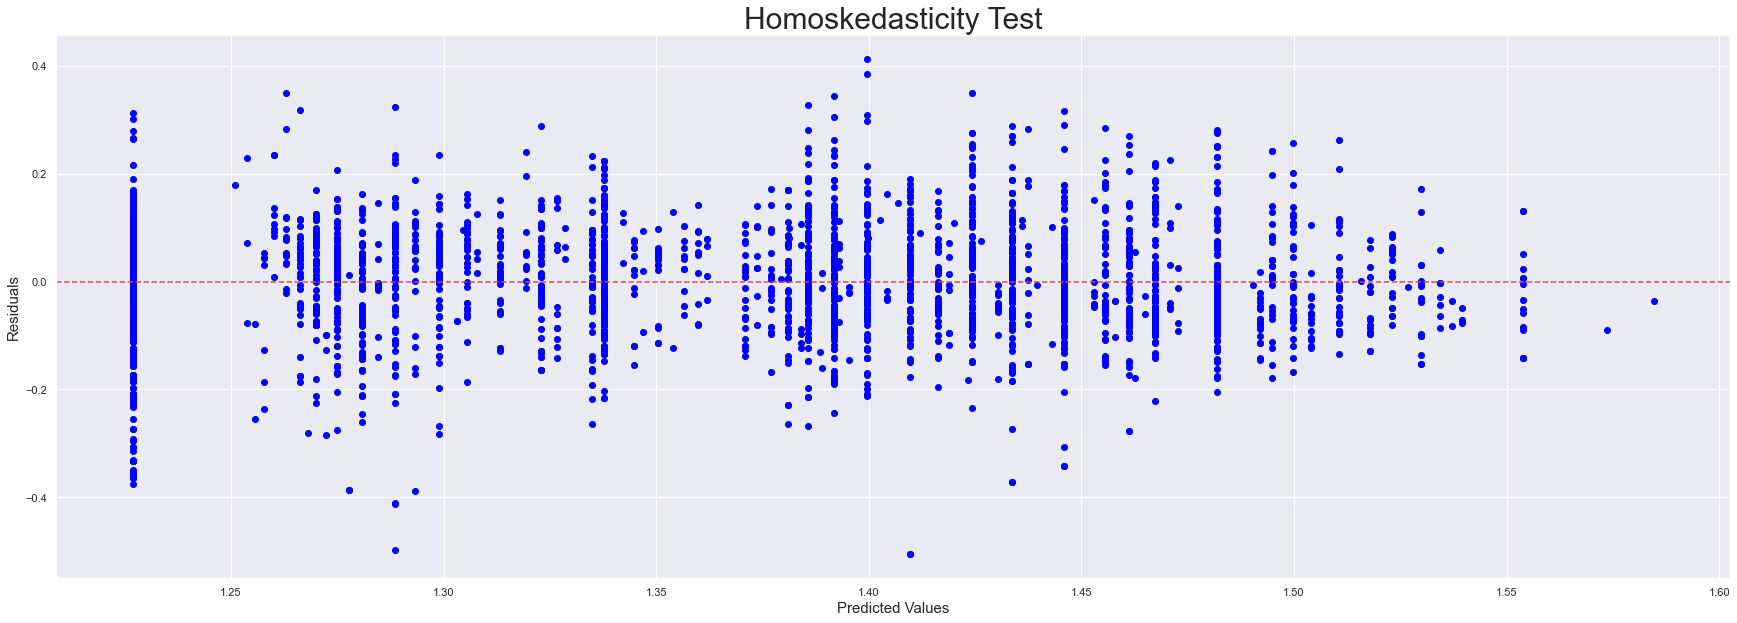

In [822]:
fig, ax = plt.subplots(figsize = (30,10))
ax.scatter(fittedvals_fe5_OLS, residuals_fe5_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [823]:
fe5_OLS_dataset = pd.concat([panel_data, residuals_fe5_OLS], axis=1).reset_index()
fe5_OLS_dataset = fe5_OLS_dataset.drop(['Date'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(panel_data['PCT_WOMEN_ON_BOARD']).fillna(0)
white_test_results = het_white(fe5_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
#3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(fe5_OLS_dataset.residual,exog)
print(dict(zip(labels, breusch_pagan_test_results)))
## no heteroskedacity
durbin_watson_test_results = durbin_watson(fe5_OLS_dataset['residual']) 
print(durbin_watson_test_results)


{'LM-Stat': 0.8242355165600941, 'LM p-val': 0.6622462864765901, 'F-Stat': 0.4118388711375654, 'F p-val': 0.6624659682669541}
{'LM-Stat': 0.11269247454577247, 'LM p-val': 0.7370993697497679, 'F-Stat': 0.11262633872214599, 'F p-val': 0.737195575824318}
0.9159214941297271


In [824]:
durbin_watson_test_results = durbin_watson(fe5_OLS_dataset['residual']) 
print(durbin_watson_test_results)

0.9159214941297271


In [825]:
panel_data['BGD*REG'] = panel_data['PCT_WOMEN_ON_BOARD'] * panel_data['REG']

In [826]:
## using comm services as BaseLine, regression with BGD, REG, BGD*REG variables
exog_vars = ['PCT_WOMEN_ON_BOARD','REG','BGD*REG']
exog = sm.tools.tools.add_constant(panel_data[exog_vars])
endog = panel_data['LN_ESG_DISCLOSURE_SCORE']
mod = PanelOLS(endog, exog,entity_effects = True)
PanelOLS6_res = mod.fit(cov_type='clustered', cluster_entity = True)
# Store values for checking homoskedasticity graphically
fittedvals_fe6_OLS = PanelOLS6_res.predict().fitted_values
residuals_fe6_OLS = PanelOLS6_res.resids

In [827]:
PanelOLS6_res

PanelOLS Estimation Summary                             
=====================================================================================
Dep. Variable:     LN_ESG_DISCLOSURE_SCORE   R-squared:                        0.3733
Estimator:                        PanelOLS   R-squared (Between):              0.1053
No. Observations:                     3066   R-squared (Within):               0.3733
Date:                     Mon, Sep 06 2021   R-squared (Overall):              0.1888
Time:                             01:32:18   Log-likelihood                    2596.9
Cov. Estimator:                  Clustered                                           
                                             F-statistic:                      544.39
Entities:                              321   P-value                           0.0000
Avg Obs:                            9.5514   Distribution:                  F(3,2742)
Min Obs:                            2.0000                                           
Max Obs:                            11.000   F-statistic (robust):             116.81
                                             P-value                           0.0000
Time periods:                           11   Distribution:                  F(3,2742)
Avg Obs:                            278.73                                           
Min Obs:                            230.00                                           
Max Obs:                            300.00                                           
                                                                                     
                                 Parameter Estimates                                  
======================================================================================
                    Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------
const                  1.2202     0.0098     125.10     0.0000      1.2011      1.2393
PCT_WOMEN_ON_BOARD     0.0050     0.0007     6.8753     0.0000      0.0036      0.0064
REG                    0.1232     0.0133     9.2662     0.0000      0.0971      0.1493
BGD*REG               -0.0009     0.0007    -1.3920     0.1640     -0.0022      0.0004
======================================================================================

F-test for Poolability: 27.476
P-value: 0.0000
Distribution: F(320,2742)

Included effects: Entity
PanelEffectsResults, id: 0x1bf558ffe50

In [828]:
## using comm services as BaseLine, regression with BGD, REG, BGD*REG variables
exog_vars = ['PCT_WOMEN_ON_BOARD','REG','BGD*REG','BOARD_SIZE','CEO_DUALITY','BOARD_AVERAGE_TENURE','BOARD_MEETING_ATTENDANCE_PCT','LN_BOARD_AVERAGE_AGE',
              'LN_BOARD_MEETINGS_PER_YR','LN_CHIEF_EXECUTIVE_OFFICER_AGE','LN_CHIEF_EXECUTIVE_OFFICER_TENURE','INDEPENDENT_DIRECTORS']
exog = sm.tools.tools.add_constant(panel_data[exog_vars])
endog = panel_data['LN_ESG_DISCLOSURE_SCORE']
mod = PanelOLS(endog, exog,entity_effects = True)
PanelOLS7_res = mod.fit(cov_type='clustered', cluster_entity = True)
# Store values for checking homoskedasticity graphically
fittedvals_fe7_OLS = PanelOLS7_res.predict().fitted_values
residuals_fe7_OLS = PanelOLS7_res.resids

In [829]:
PanelOLS7_res

PanelOLS Estimation Summary                             
=====================================================================================
Dep. Variable:     LN_ESG_DISCLOSURE_SCORE   R-squared:                        0.3017
Estimator:                        PanelOLS   R-squared (Between):              0.1736
No. Observations:                     1754   R-squared (Within):               0.3017
Date:                     Mon, Sep 06 2021   R-squared (Overall):              0.2118
Time:                             01:32:18   Log-likelihood                    1869.2
Cov. Estimator:                  Clustered                                           
                                             F-statistic:                      53.035
Entities:                              269   P-value                           0.0000
Avg Obs:                            6.5204   Distribution:                 F(12,1473)
Min Obs:                            1.0000                                           
Max Obs:                            8.0000   F-statistic (robust):             19.788
                                             P-value                           0.0000
Time periods:                           11   Distribution:                 F(12,1473)
Avg Obs:                            159.45                                           
Min Obs:                            1.0000                                           
Max Obs:                            242.00                                           
                                                                                     
                                         Parameter Estimates                                         
=====================================================================================================
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
const                                -1.1113     0.4356    -2.5515     0.0108     -1.9657     -0.2569
PCT_WOMEN_ON_BOARD                    0.0042     0.0009     4.7429     0.0000      0.0025      0.0059
REG                                   0.0585     0.0138     4.2327     0.0000      0.0314      0.0857
BGD*REG                            1.938e-05     0.0007     0.0261     0.9792     -0.0014      0.0015
BOARD_SIZE                            0.0122     0.0075     1.6276     0.1038     -0.0025      0.0270
CEO_DUALITY                          -0.0375     0.0289    -1.2986     0.1943     -0.0941      0.0191
BOARD_AVERAGE_TENURE                  0.0008     0.0034     0.2385     0.8115     -0.0058      0.0074
BOARD_MEETING_ATTENDANCE_PCT          0.0014     0.0010     1.4788     0.1394     -0.0005      0.0033
LN_BOARD_AVERAGE_AGE                  0.8828     0.2541     3.4739     0.0005      0.3843      1.3813
LN_BOARD_MEETINGS_PER_YR              0.0108     0.0220     0.4923     0.6226     -0.0323      0.0540
LN_CHIEF_EXECUTIVE_OFFICER_AGE        0.3327     0.1364     2.4390     0.0148      0.0651      0.6002
LN_CHIEF_EXECUTIVE_OFFICER_TENURE    -0.0143     0.0102    -1.4041     0.1605     -0.0343      0.0057
INDEPENDENT_DIRECTORS              6.531e-05     0.0067     0.0097     0.9922     -0.0131      0.0132
=====================================================================================================

F-test for Poolability: 22.856
P-value: 0.0000
Distribution: F(268,1473)

Included effects: Entity
PanelEffectsResults, id: 0x1bf534af7c0

In [830]:
fig, ax = plt.subplots(figsize = (30,10))
ax.scatter(fittedvals_fe7_OLS, residuals_fe7_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [831]:
fe7_OLS_dataset = pd.concat([panel_data, residuals_fe7_OLS], axis=1).reset_index()
fe7_OLS_dataset = fe7_OLS_dataset.drop(['Date'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(panel_data['PCT_WOMEN_ON_BOARD']).fillna(0)
white_test_results = het_white(fe7_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
#3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(fe7_OLS_dataset.residual,exog)
print(dict(zip(labels, breusch_pagan_test_results)))
## no heteroskedacity
durbin_watson_test_results = durbin_watson(fe7_OLS_dataset['residual']) 
print(durbin_watson_test_results)


{'LM-Stat': 1.0629675985959324, 'LM p-val': 0.5877322456713218, 'F-Stat': 0.531163574879893, 'F p-val': 0.5879720984345504}
{'LM-Stat': 0.005280573074827544, 'LM p-val': 0.9420706702251108, 'F-Stat': 0.005277297801365734, 'F p-val': 0.9420931269984691}
1.152011323155501


In [832]:
## using comm services as BaseLine, regression with BGD, REG, BGD*REG variables
exog_vars = ['PCT_WOMEN_ON_BOARD','REG','BGD*REG','BOARD_SIZE','CEO_DUALITY','BOARD_AVERAGE_TENURE','BOARD_MEETING_ATTENDANCE_PCT','LN_BOARD_AVERAGE_AGE',
              'LN_BOARD_MEETINGS_PER_YR','LN_CHIEF_EXECUTIVE_OFFICER_AGE','LN_CHIEF_EXECUTIVE_OFFICER_TENURE','INDEPENDENT_DIRECTORS'
,'ROE','LN_CUR_MKT_CAP','ROA','D/E']
exog = sm.tools.tools.add_constant(panel_data[exog_vars])
endog = panel_data['LN_ESG_DISCLOSURE_SCORE']
mod = PanelOLS(endog, exog,entity_effects = True)
PanelOLS8_res = mod.fit(cov_type='clustered', cluster_entity = True)
# Store values for checking homoskedasticity graphically
fittedvals_fe8_OLS = PanelOLS8_res.predict().fitted_values
residuals_fe8_OLS = PanelOLS8_res.resids

In [833]:
PanelOLS8_res

PanelOLS Estimation Summary                             
=====================================================================================
Dep. Variable:     LN_ESG_DISCLOSURE_SCORE   R-squared:                        0.3071
Estimator:                        PanelOLS   R-squared (Between):              0.2386
No. Observations:                     1754   R-squared (Within):               0.3071
Date:                     Mon, Sep 06 2021   R-squared (Overall):              0.2595
Time:                             01:32:19   Log-likelihood                    1876.0
Cov. Estimator:                  Clustered                                           
                                             F-statistic:                      40.686
Entities:                              269   P-value                           0.0000
Avg Obs:                            6.5204   Distribution:                 F(16,1469)
Min Obs:                            1.0000                                           
Max Obs:                            8.0000   F-statistic (robust):             14.937
                                             P-value                           0.0000
Time periods:                           11   Distribution:                 F(16,1469)
Avg Obs:                            159.45                                           
Min Obs:                            1.0000                                           
Max Obs:                            242.00                                           
                                                                                     
                                         Parameter Estimates                                         
=====================================================================================================
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
const                                -1.2720     0.4354    -2.9210     0.0035     -2.1261     -0.4178
PCT_WOMEN_ON_BOARD                    0.0042     0.0009     4.7043     0.0000      0.0024      0.0059
REG                                   0.0624     0.0138     4.5256     0.0000      0.0354      0.0895
BGD*REG                              -0.0001     0.0007    -0.1628     0.8707     -0.0016      0.0013
BOARD_SIZE                            0.0117     0.0075     1.5532     0.1206     -0.0031      0.0265
CEO_DUALITY                          -0.0367     0.0286    -1.2805     0.2006     -0.0928      0.0195
BOARD_AVERAGE_TENURE              -5.155e-05     0.0033    -0.0156     0.9875     -0.0065      0.0064
BOARD_MEETING_ATTENDANCE_PCT          0.0014     0.0009     1.4630     0.1437     -0.0005      0.0032
LN_BOARD_AVERAGE_AGE                  0.8964     0.2522     3.5541     0.0004      0.4017      1.3911
LN_BOARD_MEETINGS_PER_YR              0.0128     0.0224     0.5711     0.5680     -0.0312      0.0567
LN_CHIEF_EXECUTIVE_OFFICER_AGE        0.3458     0.1383     2.4999     0.0125      0.0745      0.6171
LN_CHIEF_EXECUTIVE_OFFICER_TENURE    -0.0156     0.0102    -1.5348     0.1250     -0.0356      0.0043
INDEPENDENT_DIRECTORS                -0.0002     0.0067    -0.0289     0.9770     -0.0134      0.0130
ROE                                  -0.0004     0.0008    -0.5179     0.6046     -0.0020      0.0011
LN_CUR_MKT_CAP                        0.0368     0.0177     2.0816     0.0375      0.0021      0.0714
ROA                                  -0.0008     0.0033    -0.2457     0.8059     -0.0073      0.0056
D/E                                   0.0002     0.0002     1.2135     0.2251     -0.0001      0.0005
=====================================================================================================

F-test for Poolability: 20.783
P-value: 0.0000
Distribution: F(268,1469)

Included effects: Entity
PanelEffectsResults, id: 0x1bf5a616310

In [834]:
fig, ax = plt.subplots(figsize = (30,10))
ax.scatter(fittedvals_fe8_OLS, residuals_fe8_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [835]:
fe8_OLS_dataset = pd.concat([panel_data, residuals_fe8_OLS], axis=1).reset_index()
fe8_OLS_dataset = fe8_OLS_dataset.drop(['Date'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(panel_data['PCT_WOMEN_ON_BOARD']).fillna(0)
white_test_results = het_white(fe8_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
#3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(fe8_OLS_dataset.residual,exog)
print(dict(zip(labels, breusch_pagan_test_results)))
## no heteroskedacity
durbin_watson_test_results = durbin_watson(fe8_OLS_dataset['residual']) 
print(durbin_watson_test_results)


{'LM-Stat': 1.0952308475027515, 'LM p-val': 0.578327232826701, 'F-Stat': 0.5472909721605785, 'F p-val': 0.5785688239671967}
{'LM-Stat': 0.0065372963519827465, 'LM p-val': 0.9355584216534973, 'F-Stat': 0.00653324414959713, 'F p-val': 0.9355833862124694}
1.149545968185277


In [836]:
panel_data.columns

Index(['BOARD_MEETING_ATTENDANCE_PCT', 'BOARD_SIZE', 'CEO_DUALITY',
       'CUR_MKT_CAP', 'ENVIRON_DISCLOSURE_SCORE', 'EQY_INST_PCT_SH_OUT',
       'ESG_DISCLOSURE_SCORE', 'FEMALE_CEO_OR_EQUIVALENT',
       'GOVNCE_DISCLOSURE_SCORE', 'INDEPENDENT_DIRECTORS',
       'NUMBER_OF_WOMEN_ON_BOARD', 'PCT_IND_DIRECTORS_ON_COMP_CMTE',
       'PCT_WOMEN_ON_BOARD', 'SOCIAL_DISCLOSURE_SCORE', 'BOARD_AVERAGE_TENURE',
       'BS_TOT_ASSET', 'EPS_GROWTH', 'FNCL_LVRG', 'NET_INCOME',
       'PCT_INSIDER_SHARES_OUT', 'RETURN_COM_EQY', 'RETURN_ON_ASSET',
       'SALES_GROWTH', 'SHORT_AND_LONG_TERM_DEBT', 'TOBIN_Q_RATIO',
       'TOTAL_EQUITY', 'security_name', 'gics_sector_name', 'Firm Age',
       'LN_BOARD_AVERAGE_AGE', 'LN_BOARD_MEETINGS_PER_YR',
       'LN_TOT_COMP_AW_TO_CEO_&_EQUIV', 'LN_CHIEF_EXECUTIVE_OFFICER_TENURE',
       'Ratio of shares', 'LN_CHIEF_EXECUTIVE_OFFICER_AGE', 'LN_CUR_MKT_CAP',
       'LN_ESG_DISCLOSURE_SCORE', 'LN_ENVIRON_DISCLOSURE_SCORE',
       'LN_SOCIAL_DISCLOSURE_SCORE', 'R

In [837]:
## determine industry with highest CSR Score
## Financials has the highest CSR SCORE
mean_csr_score = df2.groupby('gics_sector_name')['ESG_DISCLOSURE_SCORE'].mean()
mean_csr_score

gics_sector_name
Communication Services    30.988427
Consumer Discretionary    23.075133
Consumer Staples          24.750077
Energy                    26.113777
Financials                31.241675
Health Care               16.099393
Industrials               27.590071
Information Technology    20.266072
Materials                 29.540999
Real Estate               18.543575
Utilities                 27.891459
Name: ESG_DISCLOSURE_SCORE, dtype: float64

In [838]:
## using comm services as BaseLine, regression with BGD, REG, BGD*REG variables
exog_vars = ['PCT_WOMEN_ON_BOARD','Financials']
exog = sm.tools.tools.add_constant(panel_data[exog_vars])
endog = panel_data['LN_ESG_DISCLOSURE_SCORE']
mod = PanelOLS(endog, exog)
PanelOLS9_res = mod.fit(cov_type='clustered', cluster_entity = True)
# Store values for checking homoskedasticity graphically
fittedvals_fe9_OLS = PanelOLS9_res.predict().fitted_values
residuals_fe9_OLS = PanelOLS9_res.resids

In [839]:
PanelOLS9_res

PanelOLS Estimation Summary                             
=====================================================================================
Dep. Variable:     LN_ESG_DISCLOSURE_SCORE   R-squared:                        0.1925
Estimator:                        PanelOLS   R-squared (Between):              0.1622
No. Observations:                     3066   R-squared (Within):               0.2671
Date:                     Mon, Sep 06 2021   R-squared (Overall):              0.1925
Time:                             01:32:20   Log-likelihood                    362.48
Cov. Estimator:                  Clustered                                           
                                             F-statistic:                      365.11
Entities:                              321   P-value                           0.0000
Avg Obs:                            9.5514   Distribution:                  F(2,3063)
Min Obs:                            2.0000                                           
Max Obs:                            11.000   F-statistic (robust):             77.826
                                             P-value                           0.0000
Time periods:                           11   Distribution:                  F(2,3063)
Avg Obs:                            278.73                                           
Min Obs:                            230.00                                           
Max Obs:                            300.00                                           
                                                                                     
                                 Parameter Estimates                                  
======================================================================================
                    Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------
const                  1.2243     0.0138     88.884     0.0000      1.1973      1.2513
PCT_WOMEN_ON_BOARD     0.0084     0.0007     12.233     0.0000      0.0070      0.0097
Financials             0.0064     0.0351     0.1828     0.8550     -0.0624      0.0752
======================================================================================


PanelEffectsResults, id: 0x1bf5c259ac0

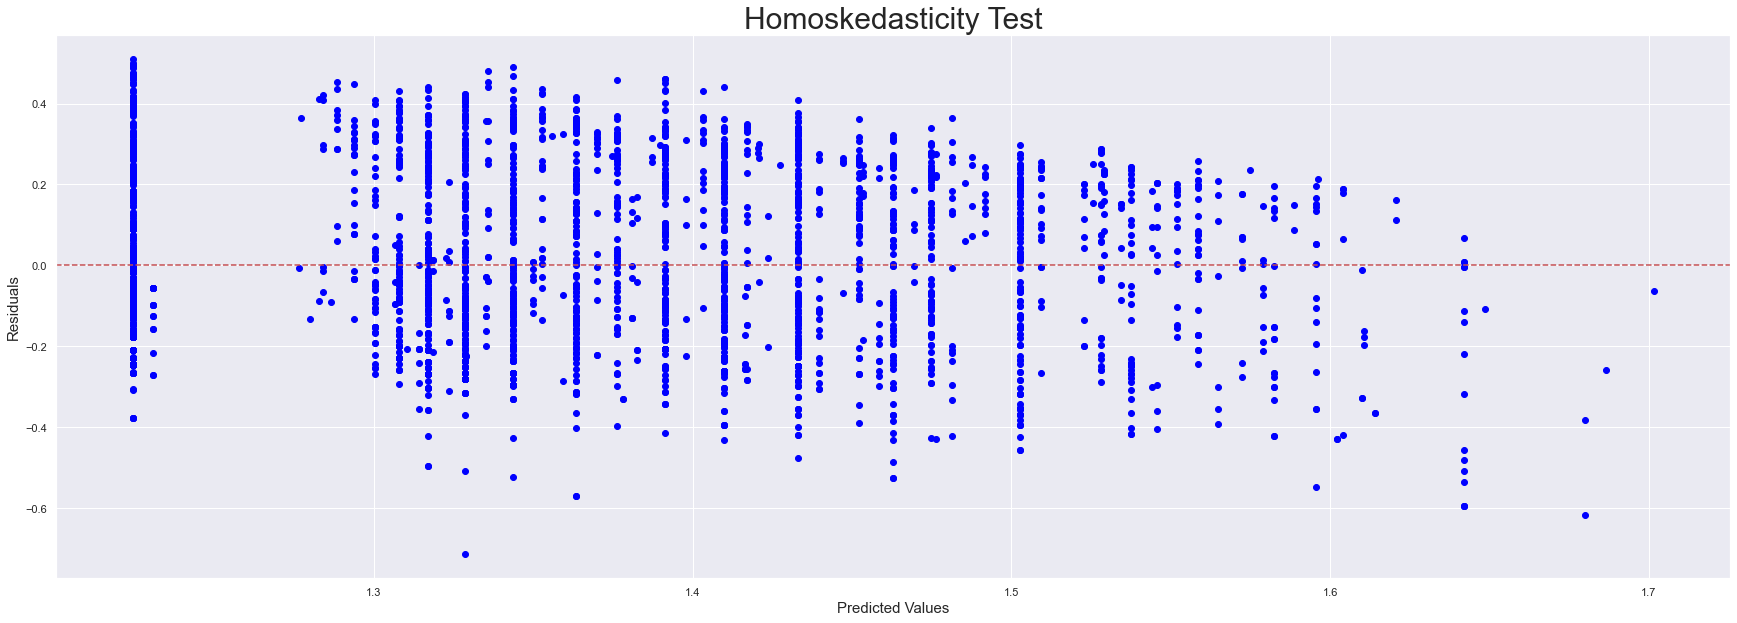

In [840]:
fig, ax = plt.subplots(figsize = (30,10))
ax.scatter(fittedvals_fe9_OLS, residuals_fe9_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [841]:
fe9_OLS_dataset = pd.concat([panel_data, residuals_fe9_OLS], axis=1).reset_index()
fe9_OLS_dataset = fe9_OLS_dataset.drop(['Date'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(panel_data['PCT_WOMEN_ON_BOARD']).fillna(0)
white_test_results = het_white(fe9_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
#3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(fe9_OLS_dataset.residual,exog)
print(dict(zip(labels, breusch_pagan_test_results)))
## no heteroskedacity
durbin_watson_test_results = durbin_watson(fe9_OLS_dataset['residual']) 
print(durbin_watson_test_results)


{'LM-Stat': 29.11115603906436, 'LM p-val': 4.770817297538871e-07, 'F-Stat': 14.67483632677654, 'F p-val': 4.526182084622798e-07}
{'LM-Stat': 14.215365803692649, 'LM p-val': 0.00016303377646475727, 'F-Stat': 14.269599899100266, 'F p-val': 0.00016127288546047058}
0.3557824877956447


In [842]:
## using comm services as BaseLine, regression with BGD, REG, BGD*REG variables
exog_vars = ['PCT_WOMEN_ON_BOARD','Financials','BOARD_SIZE','CEO_DUALITY','BOARD_AVERAGE_TENURE','BOARD_MEETING_ATTENDANCE_PCT','LN_BOARD_AVERAGE_AGE',
              'LN_BOARD_MEETINGS_PER_YR','LN_CHIEF_EXECUTIVE_OFFICER_AGE','LN_CHIEF_EXECUTIVE_OFFICER_TENURE','INDEPENDENT_DIRECTORS']
exog = sm.tools.tools.add_constant(panel_data[exog_vars])
endog = panel_data['LN_ESG_DISCLOSURE_SCORE']
mod = PanelOLS(endog, exog, time_effects=False)
PanelOLS10_res = mod.fit(cov_type='clustered', cluster_entity = True)
# Store values for checking homoskedasticity graphically
fittedvals_fe10_OLS = PanelOLS10_res.predict().fitted_values
residuals_fe10_OLS = PanelOLS10_res.resids

In [843]:
PanelOLS10_res

PanelOLS Estimation Summary                             
=====================================================================================
Dep. Variable:     LN_ESG_DISCLOSURE_SCORE   R-squared:                        0.2616
Estimator:                        PanelOLS   R-squared (Between):              0.2688
No. Observations:                     1754   R-squared (Within):               0.1976
Date:                     Mon, Sep 06 2021   R-squared (Overall):              0.2616
Time:                             01:32:21   Log-likelihood                    435.89
Cov. Estimator:                  Clustered                                           
                                             F-statistic:                      56.099
Entities:                              269   P-value                           0.0000
Avg Obs:                            6.5204   Distribution:                 F(11,1742)
Min Obs:                            1.0000                                           
Max Obs:                            8.0000   F-statistic (robust):             16.439
                                             P-value                           0.0000
Time periods:                           11   Distribution:                 F(11,1742)
Avg Obs:                            159.45                                           
Min Obs:                            1.0000                                           
Max Obs:                            242.00                                           
                                                                                     
                                         Parameter Estimates                                         
=====================================================================================================
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
const                                 0.0911     0.6494     0.1403     0.8884     -1.1826      1.3649
PCT_WOMEN_ON_BOARD                    0.0051     0.0007     6.9138     0.0000      0.0036      0.0065
Financials                           -0.0947     0.0349    -2.7090     0.0068     -0.1632     -0.0261
BOARD_SIZE                            0.0211     0.0074     2.8590     0.0043      0.0066      0.0356
CEO_DUALITY                          -0.0125     0.0329    -0.3809     0.7033     -0.0771      0.0520
BOARD_AVERAGE_TENURE                 -0.0039     0.0034    -1.1499     0.2503     -0.0105      0.0027
BOARD_MEETING_ATTENDANCE_PCT          0.0042     0.0015     2.7167     0.0067      0.0012      0.0072
LN_BOARD_AVERAGE_AGE                  0.2019     0.3792     0.5323     0.5946     -0.5419      0.9456
LN_BOARD_MEETINGS_PER_YR             -0.0607     0.0460    -1.3174     0.1879     -0.1510      0.0296
LN_CHIEF_EXECUTIVE_OFFICER_AGE        0.1661     0.1634     1.0168     0.3094     -0.1543      0.4866
LN_CHIEF_EXECUTIVE_OFFICER_TENURE    -0.0034     0.0163    -0.2107     0.8331     -0.0354      0.0285
INDEPENDENT_DIRECTORS                 0.0105     0.0077     1.3648     0.1725     -0.0046      0.0256
=====================================================================================================


PanelEffectsResults, id: 0x1bf5b0659d0

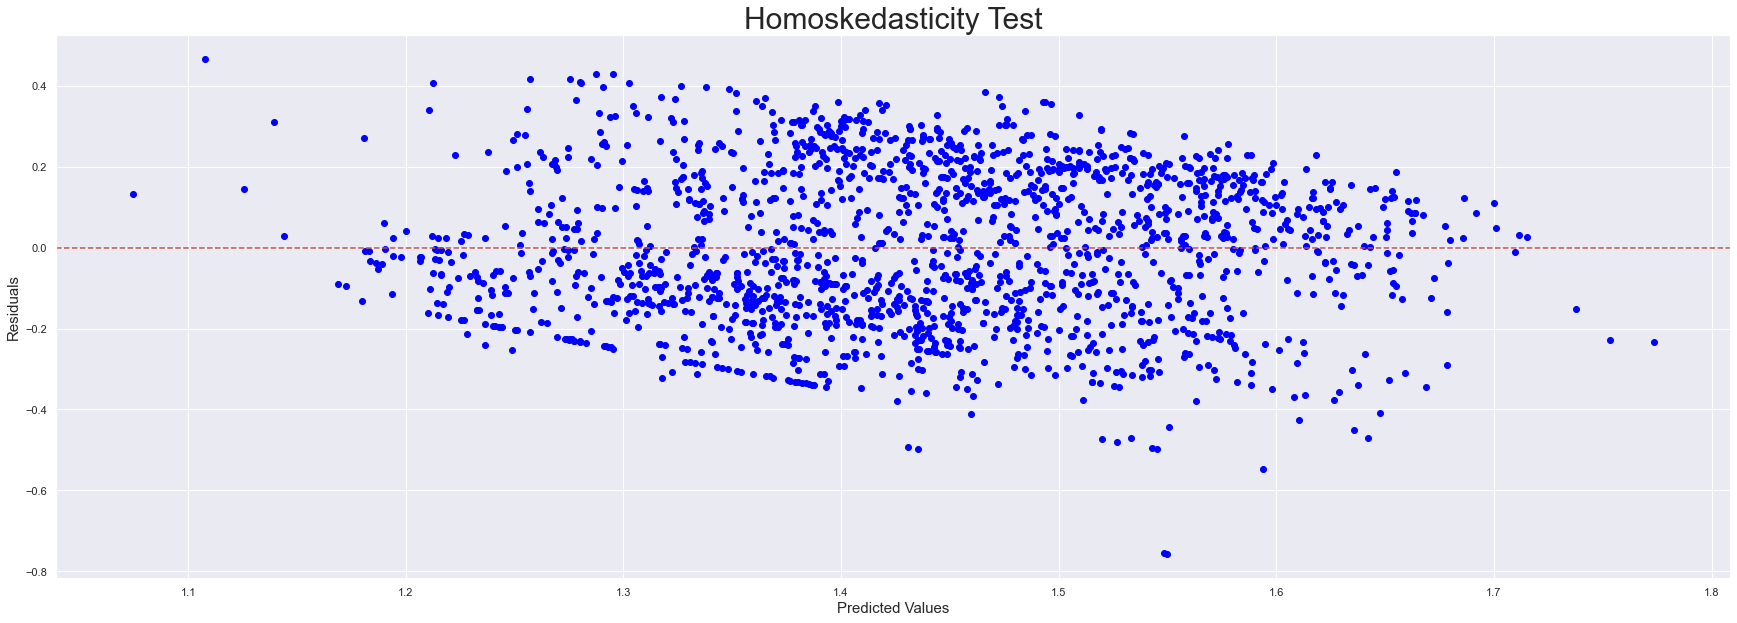

In [844]:
fig, ax = plt.subplots(figsize = (30,10))
ax.scatter(fittedvals_fe10_OLS, residuals_fe10_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [845]:
fe10_OLS_dataset = pd.concat([panel_data, residuals_fe10_OLS], axis=1).reset_index()
fe10_OLS_dataset = fe10_OLS_dataset.drop(['Date'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(panel_data['PCT_WOMEN_ON_BOARD']).fillna(0)
white_test_results = het_white(fe10_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
#3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(fe10_OLS_dataset.residual,exog)
print(dict(zip(labels, breusch_pagan_test_results)))
## no heteroskedacity
durbin_watson_test_results = durbin_watson(fe10_OLS_dataset['residual']) 
print(durbin_watson_test_results)

{'LM-Stat': 10.683903167463404, 'LM p-val': 0.004786520294066687, 'F-Stat': 5.354757509092834, 'F p-val': 0.004767881996524386}
{'LM-Stat': 1.3198144412352555, 'LM p-val': 0.25062535539332204, 'F-Stat': 1.3195351852373411, 'F p-val': 0.2507609697070283}
0.5151307898846298


In [846]:
exog_vars = ['PCT_WOMEN_ON_BOARD','Financials','BOARD_SIZE','CEO_DUALITY','BOARD_AVERAGE_TENURE','BOARD_MEETING_ATTENDANCE_PCT','LN_BOARD_AVERAGE_AGE',
              'LN_BOARD_MEETINGS_PER_YR','LN_CHIEF_EXECUTIVE_OFFICER_AGE','LN_CHIEF_EXECUTIVE_OFFICER_TENURE','INDEPENDENT_DIRECTORS'
,'ROE','LN_CUR_MKT_CAP','ROA','D/E']
exog = sm.tools.tools.add_constant(panel_data[exog_vars])
endog = panel_data['LN_ESG_DISCLOSURE_SCORE']
mod = PanelOLS(endog, exog,entity_effects = False)
PanelOLS11_res = mod.fit(cov_type='clustered', cluster_entity = True)
# Store values for checking homoskedasticity graphically
fittedvals_fe11_OLS = PanelOLS11_res.predict().fitted_values
residuals_fe11_OLS = PanelOLS11_res.resids

In [847]:
PanelOLS11_res

PanelOLS Estimation Summary                             
=====================================================================================
Dep. Variable:     LN_ESG_DISCLOSURE_SCORE   R-squared:                        0.3235
Estimator:                        PanelOLS   R-squared (Between):              0.3519
No. Observations:                     1754   R-squared (Within):               0.1880
Date:                     Mon, Sep 06 2021   R-squared (Overall):              0.3235
Time:                             01:32:22   Log-likelihood                    512.72
Cov. Estimator:                  Clustered                                           
                                             F-statistic:                      55.411
Entities:                              269   P-value                           0.0000
Avg Obs:                            6.5204   Distribution:                 F(15,1738)
Min Obs:                            1.0000                                           
Max Obs:                            8.0000   F-statistic (robust):             18.798
                                             P-value                           0.0000
Time periods:                           11   Distribution:                 F(15,1738)
Avg Obs:                            159.45                                           
Min Obs:                            1.0000                                           
Max Obs:                            242.00                                           
                                                                                     
                                         Parameter Estimates                                         
=====================================================================================================
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
const                                 0.2148     0.6485     0.3312     0.7406     -1.0571      1.4866
PCT_WOMEN_ON_BOARD                    0.0043     0.0007     5.8254     0.0000      0.0029      0.0057
Financials                           -0.1174     0.0306    -3.8413     0.0001     -0.1774     -0.0575
BOARD_SIZE                            0.0128     0.0072     1.7824     0.0749     -0.0013      0.0269
CEO_DUALITY                          -0.0357     0.0297    -1.1992     0.2306     -0.0940      0.0227
BOARD_AVERAGE_TENURE                 -0.0034     0.0031    -1.1047     0.2694     -0.0095      0.0027
BOARD_MEETING_ATTENDANCE_PCT          0.0032     0.0015     2.1277     0.0335      0.0003      0.0062
LN_BOARD_AVERAGE_AGE                 -0.0613     0.3864    -0.1588     0.8739     -0.8191      0.6964
LN_BOARD_MEETINGS_PER_YR             -0.0228     0.0446    -0.5117     0.6089     -0.1102      0.0646
LN_CHIEF_EXECUTIVE_OFFICER_AGE        0.2724     0.1633     1.6683     0.0954     -0.0478      0.5926
LN_CHIEF_EXECUTIVE_OFFICER_TENURE    -0.0094     0.0151    -0.6206     0.5350     -0.0391      0.0203
INDEPENDENT_DIRECTORS                 0.0059     0.0072     0.8203     0.4121     -0.0082      0.0200
ROE                                  -0.0012     0.0032    -0.3692     0.7120     -0.0074      0.0051
LN_CUR_MKT_CAP                        0.1024     0.0166     6.1556     0.0000      0.0698      0.1351
ROA                                  -0.0276     0.0116    -2.3770     0.0176     -0.0504     -0.0048
D/E                                  -0.0010     0.0008    -1.1688     0.2426     -0.0026      0.0007
=====================================================================================================


PanelEffectsResults, id: 0x1bf5c1c1b50

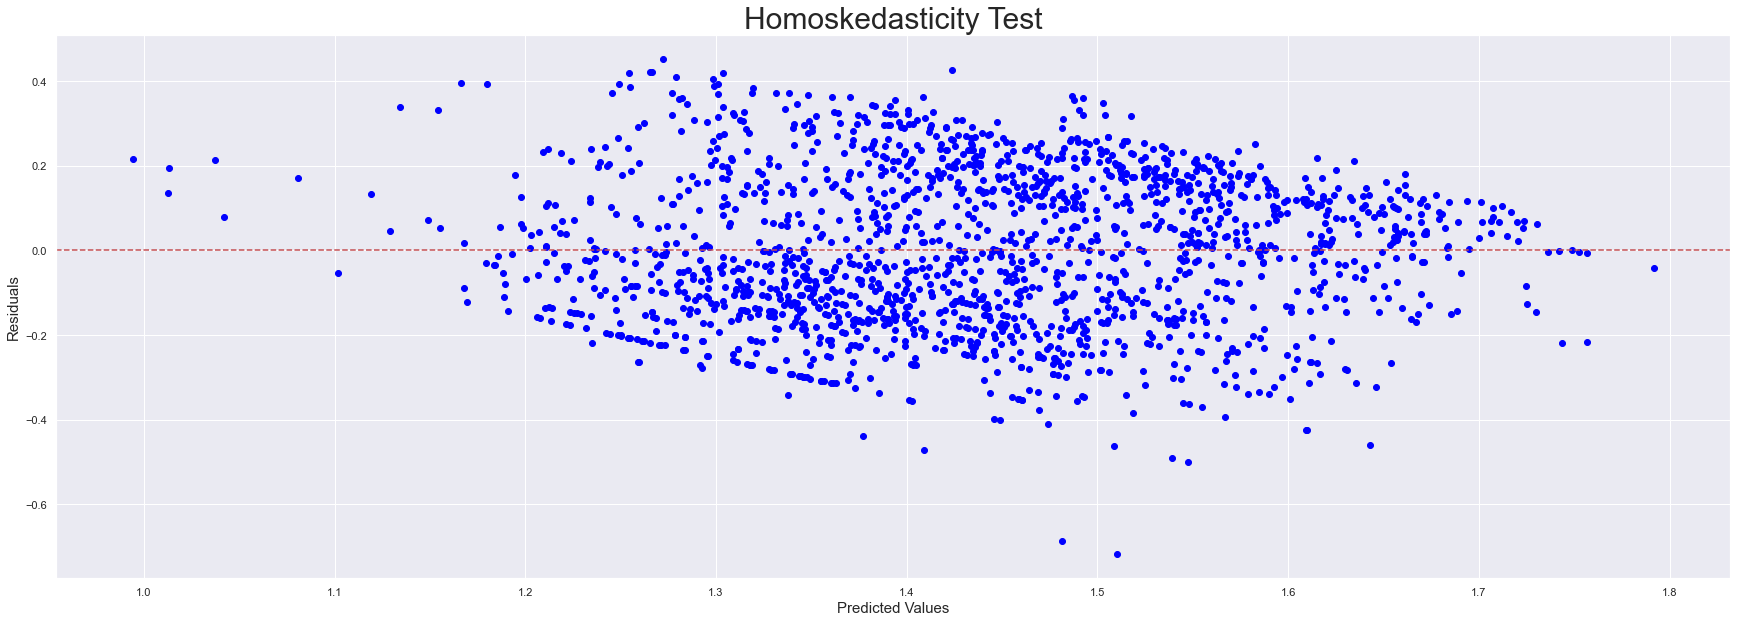

In [848]:
fig, ax = plt.subplots(figsize = (30,10))
ax.scatter(fittedvals_fe11_OLS, residuals_fe11_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [849]:
fe11_OLS_dataset = pd.concat([panel_data, residuals_fe11_OLS], axis=1).reset_index()
fe11_OLS_dataset = fe11_OLS_dataset.drop(['Date'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(panel_data['PCT_WOMEN_ON_BOARD']).fillna(0)
white_test_results = het_white(fe11_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
#3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(fe11_OLS_dataset.residual,exog)
print(dict(zip(labels, breusch_pagan_test_results)))
## no heteroskedacity
durbin_watson_test_results = durbin_watson(fe11_OLS_dataset['residual']) 
print(durbin_watson_test_results)

{'LM-Stat': 6.354417754720529, 'LM p-val': 0.04170188791920915, 'F-Stat': 3.1805293953413125, 'F p-val': 0.04169453734538768}
{'LM-Stat': 3.27283118772416, 'LM p-val': 0.07043596803853812, 'F-Stat': 3.274127831164305, 'F p-val': 0.070473711301362}
0.5281102346193499


In [854]:
## ENV dependent
exog_vars = ['PCT_WOMEN_ON_BOARD']
exog = sm.tools.tools.add_constant(panel_data[exog_vars])
endog = panel_data['LN_ENVIRON_DISCLOSURE_SCORE']
mod = PanelOLS(endog, exog,entity_effects = True)
PanelOLS12_res = mod.fit(cov_type='clustered', cluster_entity = True)
# Store values for checking homoskedasticity graphically
fittedvals_fe12_OLS = PanelOLS12_res.predict().fitted_values
residuals_fe12_OLS = PanelOLS12_res.resids

In [855]:
PanelOLS12_res

PanelOLS Estimation Summary                               
=========================================================================================
Dep. Variable:     LN_ENVIRON_DISCLOSURE_SCORE   R-squared:                        0.1844
Estimator:                            PanelOLS   R-squared (Between):             -0.0561
No. Observations:                         2130   R-squared (Within):               0.1844
Date:                         Mon, Sep 06 2021   R-squared (Overall):              0.0560
Time:                                 01:36:06   Log-likelihood                    191.47
Cov. Estimator:                      Clustered                                           
                                                 F-statistic:                      418.65
Entities:                                  277   P-value                           0.0000
Avg Obs:                                7.6895   Distribution:                  F(1,1852)
Min Obs:                                1.0000                                           
Max Obs:                                11.000   F-statistic (robust):             101.65
                                                 P-value                           0.0000
Time periods:                               11   Distribution:                  F(1,1852)
Avg Obs:                                193.64                                           
Min Obs:                                115.00                                           
Max Obs:                                253.00                                           
                                                                                         
                                 Parameter Estimates                                  
======================================================================================
                    Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------
const                  0.9027     0.0252     35.813     0.0000      0.8533      0.9522
PCT_WOMEN_ON_BOARD     0.0133     0.0013     10.082     0.0000      0.0107      0.0159
======================================================================================

F-test for Poolability: 22.034
P-value: 0.0000
Distribution: F(276,1852)

Included effects: Entity
PanelEffectsResults, id: 0x1bf5ae14880

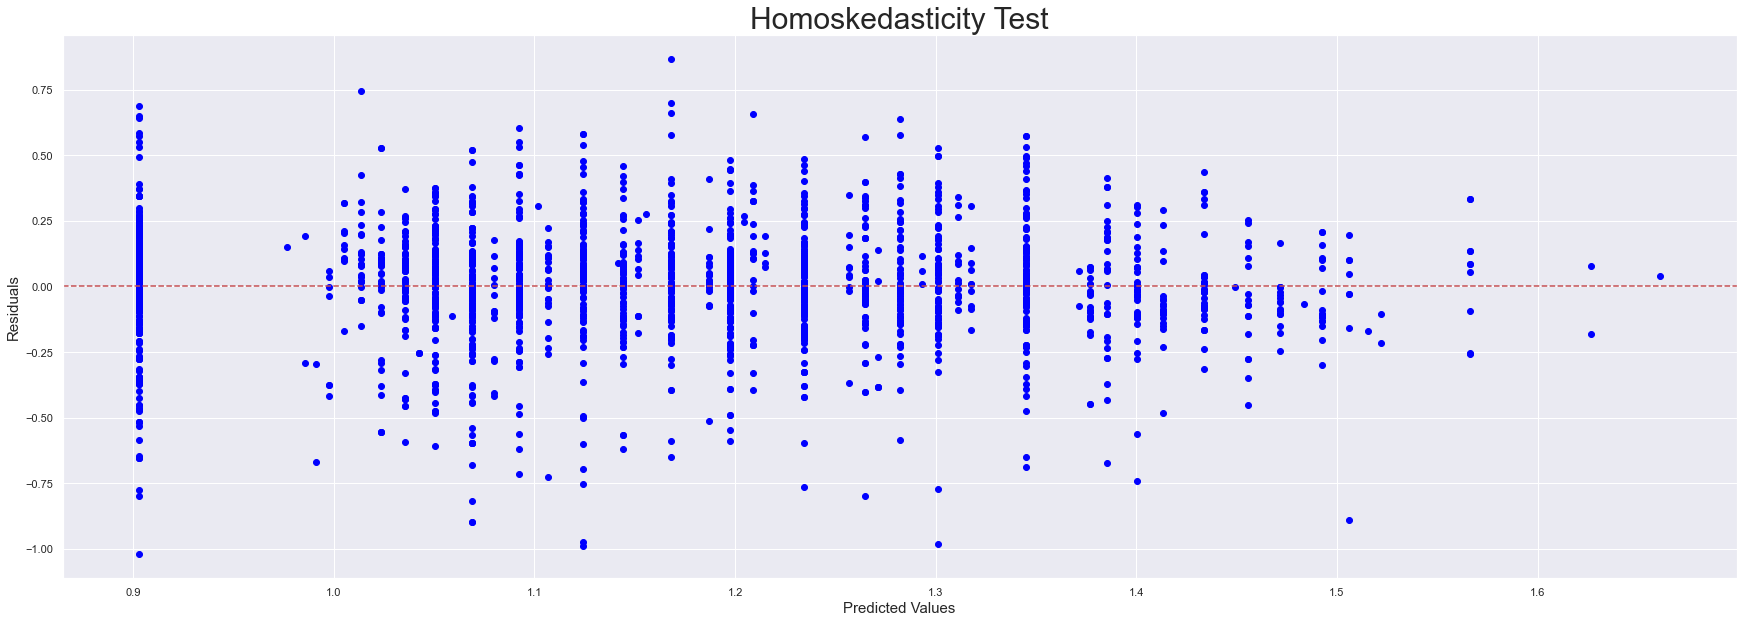

In [856]:
fig, ax = plt.subplots(figsize = (30,10))
ax.scatter(fittedvals_fe12_OLS, residuals_fe12_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [857]:
fe12_OLS_dataset = pd.concat([panel_data, residuals_fe12_OLS], axis=1).reset_index()
fe12_OLS_dataset = fe12_OLS_dataset.drop(['Date'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(panel_data['PCT_WOMEN_ON_BOARD']).fillna(0)
white_test_results = het_white(fe12_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
#3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(fe12_OLS_dataset.residual,exog)
print(dict(zip(labels, breusch_pagan_test_results)))
## no heteroskedacity
durbin_watson_test_results = durbin_watson(fe12_OLS_dataset['residual']) 
print(durbin_watson_test_results)

{'LM-Stat': 15.533935953123843, 'LM p-val': 0.00042349537003119717, 'F-Stat': 7.797385633621954, 'F p-val': 0.0004186297171492644}
{'LM-Stat': 1.8799540648382358, 'LM p-val': 0.17033936865972465, 'F-Stat': 1.8798838494013488, 'F p-val': 0.17044307549329135}
1.0612199324731617


In [861]:
#ENV regression
exog_vars = ['PCT_WOMEN_ON_BOARD','BOARD_SIZE','CEO_DUALITY','BOARD_AVERAGE_TENURE','BOARD_MEETING_ATTENDANCE_PCT','LN_BOARD_AVERAGE_AGE',
              'LN_BOARD_MEETINGS_PER_YR','LN_CHIEF_EXECUTIVE_OFFICER_AGE','LN_CHIEF_EXECUTIVE_OFFICER_TENURE','INDEPENDENT_DIRECTORS']
exog = sm.tools.tools.add_constant(panel_data[exog_vars])
endog = panel_data['LN_ENVIRON_DISCLOSURE_SCORE']
mod = PanelOLS(endog, exog,entity_effects = True)
PanelOLS13_res = mod.fit(cov_type='clustered', cluster_entity = True)
# Store values for checking homoskedasticity graphically
fittedvals_fe13_OLS = PanelOLS13_res.predict().fitted_values
residuals_fe13_OLS = PanelOLS13_res.resids

In [862]:
PanelOLS13_res

PanelOLS Estimation Summary                               
=========================================================================================
Dep. Variable:     LN_ENVIRON_DISCLOSURE_SCORE   R-squared:                        0.1678
Estimator:                            PanelOLS   R-squared (Between):              0.0066
No. Observations:                         1458   R-squared (Within):               0.1678
Date:                         Mon, Sep 06 2021   R-squared (Overall):              0.0656
Time:                                 01:40:24   Log-likelihood                    365.98
Cov. Estimator:                      Clustered                                           
                                                 F-statistic:                      24.293
Entities:                                  243   P-value                           0.0000
Avg Obs:                                6.0000   Distribution:                 F(10,1205)
Min Obs:                                1.0000                                           
Max Obs:                                8.0000   F-statistic (robust):             9.9658
                                                 P-value                           0.0000
Time periods:                               11   Distribution:                 F(10,1205)
Avg Obs:                                132.55                                           
Min Obs:                                1.0000                                           
Max Obs:                                220.00                                           
                                                                                         
                                         Parameter Estimates                                         
=====================================================================================================
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
const                                -5.2555     1.0963    -4.7938     0.0000     -7.4065     -3.1046
PCT_WOMEN_ON_BOARD                    0.0096     0.0013     7.1846     0.0000      0.0070      0.0122
BOARD_SIZE                            0.0247     0.0170     1.4493     0.1475     -0.0087      0.0581
CEO_DUALITY                          -0.0692     0.0808    -0.8561     0.3921     -0.2278      0.0894
BOARD_AVERAGE_TENURE                 -0.0064     0.0075    -0.8530     0.3938     -0.0212      0.0084
BOARD_MEETING_ATTENDANCE_PCT          0.0026     0.0021     1.2366     0.2165     -0.0015      0.0067
LN_BOARD_AVERAGE_AGE                  2.5028     0.5696     4.3939     0.0000      1.3853      3.6203
LN_BOARD_MEETINGS_PER_YR             -0.0641     0.0644    -0.9965     0.3192     -0.1904      0.0621
LN_CHIEF_EXECUTIVE_OFFICER_AGE        0.8925     0.3003     2.9723     0.0030      0.3034      1.4816
LN_CHIEF_EXECUTIVE_OFFICER_TENURE    -0.0387     0.0249    -1.5528     0.1207     -0.0876      0.0102
INDEPENDENT_DIRECTORS                -0.0177     0.0164    -1.0838     0.2787     -0.0498      0.0144
=====================================================================================================

F-test for Poolability: 20.257
P-value: 0.0000
Distribution: F(242,1205)

Included effects: Entity
PanelEffectsResults, id: 0x1bf5f76c460

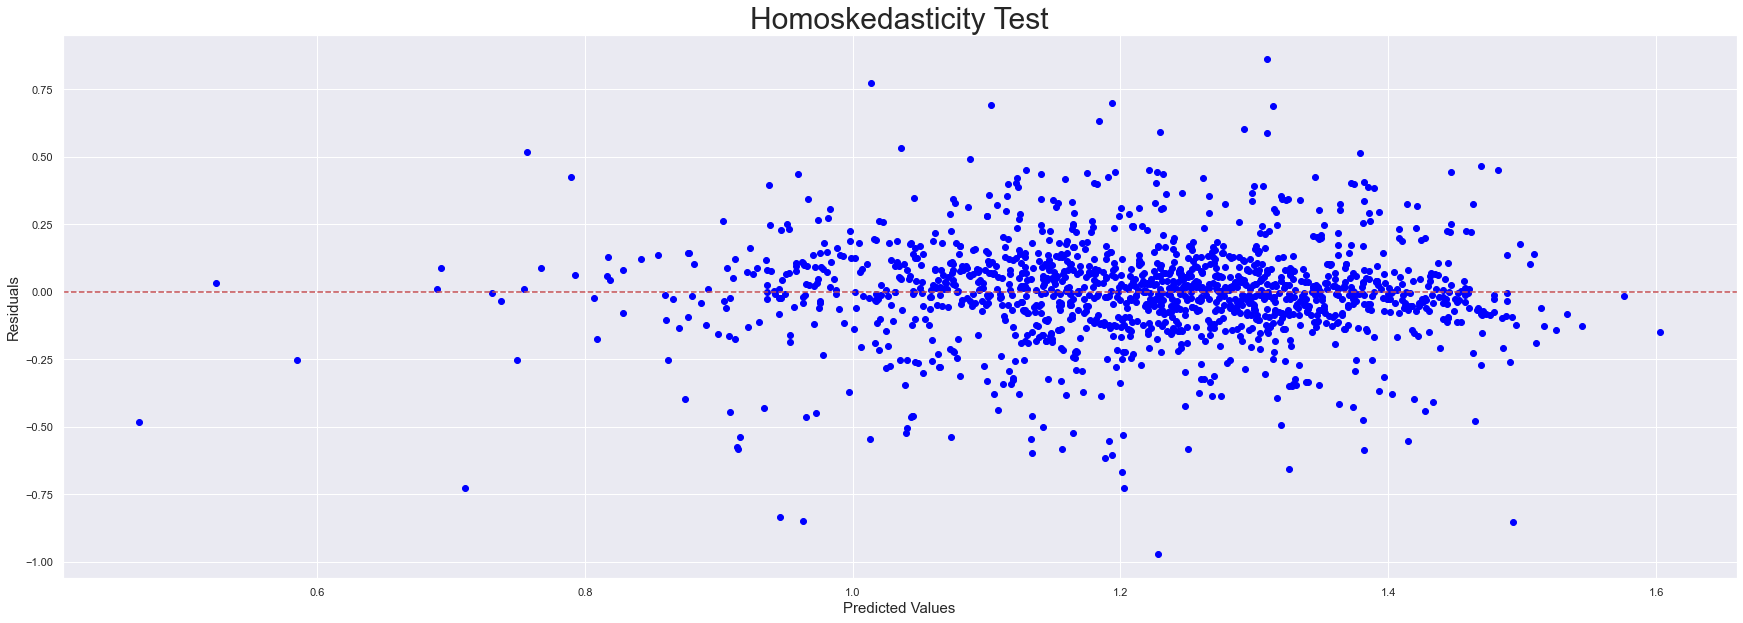

In [863]:
fig, ax = plt.subplots(figsize = (30,10))
ax.scatter(fittedvals_fe13_OLS, residuals_fe13_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [864]:
fe13_OLS_dataset = pd.concat([panel_data, residuals_fe13_OLS], axis=1).reset_index()
fe13_OLS_dataset = fe13_OLS_dataset.drop(['Date'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(panel_data['PCT_WOMEN_ON_BOARD']).fillna(0)
white_test_results = het_white(fe13_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
#3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(fe13_OLS_dataset.residual,exog)
print(dict(zip(labels, breusch_pagan_test_results)))
## no heteroskedacity
durbin_watson_test_results = durbin_watson(fe13_OLS_dataset['residual']) 
print(durbin_watson_test_results)

{'LM-Stat': 14.538118442160165, 'LM p-val': 0.0006967671893983319, 'F-Stat': 7.295257023633704, 'F p-val': 0.000690052552900935}
{'LM-Stat': 3.943730547768979, 'LM p-val': 0.047046337528711596, 'F-Stat': 3.946117040686671, 'F p-val': 0.047064445544973896}
1.293896983904337


In [865]:
exog_vars = ['PCT_WOMEN_ON_BOARD','BOARD_SIZE','CEO_DUALITY','BOARD_AVERAGE_TENURE','BOARD_MEETING_ATTENDANCE_PCT','LN_BOARD_AVERAGE_AGE',
              'LN_BOARD_MEETINGS_PER_YR','LN_CHIEF_EXECUTIVE_OFFICER_AGE','LN_CHIEF_EXECUTIVE_OFFICER_TENURE','INDEPENDENT_DIRECTORS'
,'ROE','LN_CUR_MKT_CAP','ROA','D/E']
exog = sm.tools.tools.add_constant(panel_data[exog_vars])
endog = panel_data['LN_ENVIRON_DISCLOSURE_SCORE']
mod = PanelOLS(endog, exog,entity_effects = True)
PanelOLS14_res = mod.fit(cov_type='clustered', cluster_entity = True)
# Store values for checking homoskedasticity graphically
fittedvals_fe14_OLS = PanelOLS14_res.predict().fitted_values
residuals_fe14_OLS = PanelOLS14_res.resids

In [866]:
PanelOLS14_res

PanelOLS Estimation Summary                               
=========================================================================================
Dep. Variable:     LN_ENVIRON_DISCLOSURE_SCORE   R-squared:                        0.1732
Estimator:                            PanelOLS   R-squared (Between):              0.0677
No. Observations:                         1458   R-squared (Within):               0.1732
Date:                         Mon, Sep 06 2021   R-squared (Overall):              0.1142
Time:                                 01:43:44   Log-likelihood                    370.79
Cov. Estimator:                      Clustered                                           
                                                 F-statistic:                      17.976
Entities:                                  243   P-value                           0.0000
Avg Obs:                                6.0000   Distribution:                 F(14,1201)
Min Obs:                                1.0000                                           
Max Obs:                                8.0000   F-statistic (robust):             7.5400
                                                 P-value                           0.0000
Time periods:                               11   Distribution:                 F(14,1201)
Avg Obs:                                132.55                                           
Min Obs:                                1.0000                                           
Max Obs:                                220.00                                           
                                                                                         
                                         Parameter Estimates                                         
=====================================================================================================
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
const                                -5.5448     1.1416    -4.8571     0.0000     -7.7845     -3.3051
PCT_WOMEN_ON_BOARD                    0.0094     0.0013     7.0716     0.0000      0.0068      0.0120
BOARD_SIZE                            0.0242     0.0170     1.4218     0.1553     -0.0092      0.0575
CEO_DUALITY                          -0.0722     0.0800    -0.9023     0.3671     -0.2293      0.0848
BOARD_AVERAGE_TENURE                 -0.0076     0.0075    -1.0066     0.3143     -0.0224      0.0072
BOARD_MEETING_ATTENDANCE_PCT          0.0025     0.0021     1.1949     0.2323     -0.0016      0.0066
LN_BOARD_AVERAGE_AGE                  2.4992     0.5640     4.4314     0.0000      1.3927      3.6058
LN_BOARD_MEETINGS_PER_YR             -0.0559     0.0653    -0.8565     0.3919     -0.1840      0.0722
LN_CHIEF_EXECUTIVE_OFFICER_AGE        0.9448     0.3030     3.1186     0.0019      0.3504      1.5391
LN_CHIEF_EXECUTIVE_OFFICER_TENURE    -0.0404     0.0246    -1.6416     0.1009     -0.0886      0.0079
INDEPENDENT_DIRECTORS                -0.0185     0.0162    -1.1407     0.2542     -0.0503      0.0133
ROE                                  -0.0033     0.0022    -1.5176     0.1294     -0.0075      0.0010
LN_CUR_MKT_CAP                        0.0654     0.0492     1.3276     0.1846     -0.0312      0.1620
ROA                                   0.0137     0.0073     1.8864     0.0595     -0.0005      0.0279
D/E                                   0.0008     0.0006     1.3431     0.1795     -0.0004      0.0019
=====================================================================================================

F-test for Poolability: 18.092
P-value: 0.0000
Distribution: F(242,1201)

Included effects: Entity
PanelEffectsResults, id: 0x1bf5f76ce20

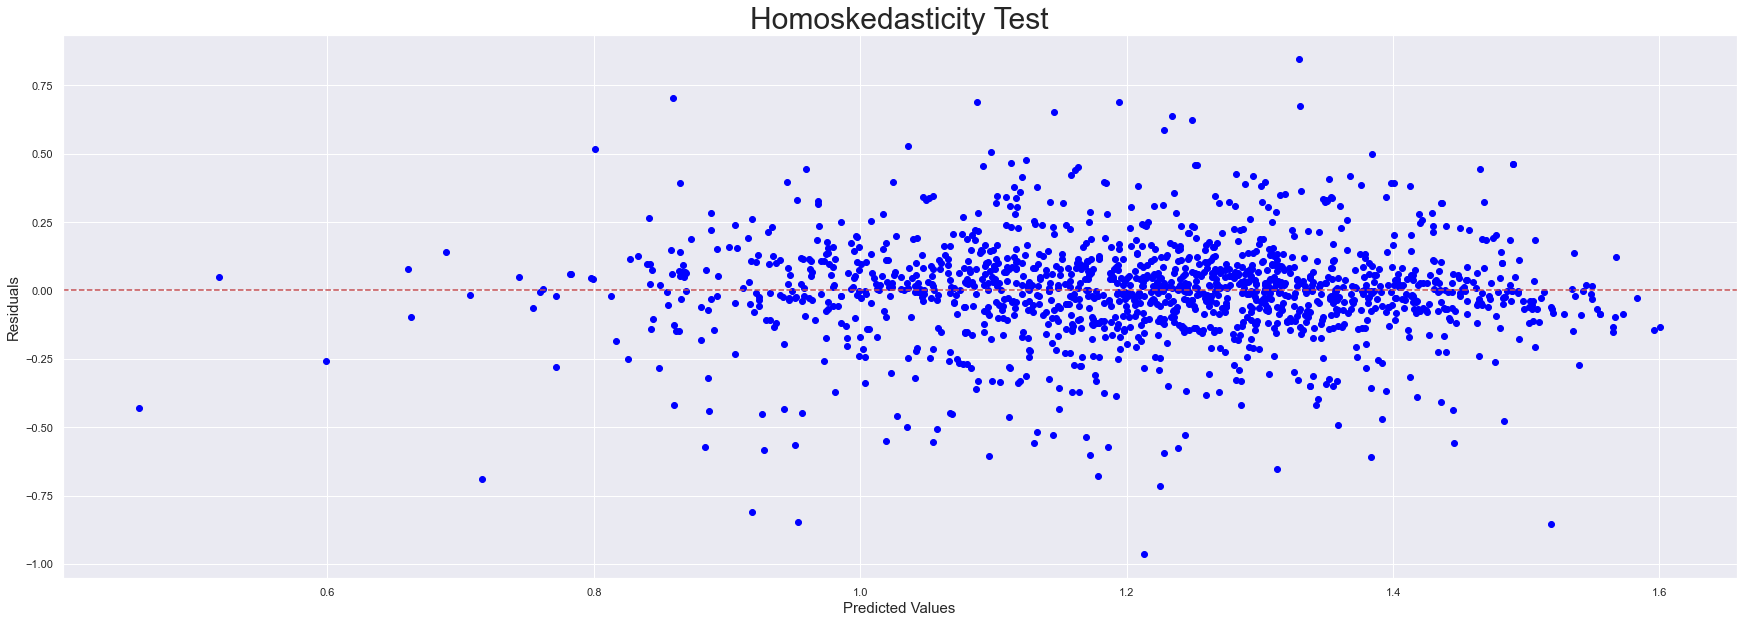

In [867]:
fig, ax = plt.subplots(figsize = (30,10))
ax.scatter(fittedvals_fe14_OLS, residuals_fe14_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [882]:
fe14_OLS_dataset = pd.concat([panel_data, residuals_fe14_OLS], axis=1).reset_index()
fe14_OLS_dataset = fe14_OLS_dataset.drop(['Date'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(panel_data['PCT_WOMEN_ON_BOARD']).fillna(0)
white_test_results = het_white(fe14_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
#3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(fe14_OLS_dataset.residual,exog)
print(dict(zip(labels, breusch_pagan_test_results)))
## no heteroskedacity
durbin_watson_test_results = durbin_watson(fe14_OLS_dataset['residual']) 
print(durbin_watson_test_results)

{'LM-Stat': 14.744811698109645, 'LM p-val': 0.0006283546327463065, 'F-Stat': 7.399453839098035, 'F p-val': 0.0006220654542884695}
{'LM-Stat': 3.9196293353726617, 'LM p-val': 0.04772540183046713, 'F-Stat': 3.9219718158176864, 'F p-val': 0.04774409076498064}
1.2956263288787968


In [869]:
exog_vars = ['PCT_WOMEN_ON_BOARD']
exog = sm.tools.tools.add_constant(panel_data[exog_vars])
endog = panel_data['LN_SOCIAL_DISCLOSURE_SCORE']
mod = PanelOLS(endog, exog,entity_effects = True)
PanelOLS15_res = mod.fit(cov_type='clustered', cluster_entity = True)
# Store values for checking homoskedasticity graphically
fittedvals_fe15_OLS = PanelOLS15_res.predict().fitted_values
residuals_fe15_OLS = PanelOLS15_res.resids

In [870]:
PanelOLS15_res

PanelOLS Estimation Summary                               
========================================================================================
Dep. Variable:     LN_SOCIAL_DISCLOSURE_SCORE   R-squared:                        0.1880
Estimator:                           PanelOLS   R-squared (Between):              0.0498
No. Observations:                        2741   R-squared (Within):               0.1880
Date:                        Mon, Sep 06 2021   R-squared (Overall):              0.1019
Time:                                01:47:56   Log-likelihood                    587.47
Cov. Estimator:                     Clustered                                           
                                                F-statistic:                      562.89
Entities:                                 309   P-value                           0.0000
Avg Obs:                               8.8706   Distribution:                  F(1,2431)
Min Obs:                               2.0000                                           
Max Obs:                               11.000   F-statistic (robust):             176.74
                                                P-value                           0.0000
Time periods:                              11   Distribution:                  F(1,2431)
Avg Obs:                               249.18                                           
Min Obs:                               199.00                                           
Max Obs:                               292.00                                           
                                                                                        
                                 Parameter Estimates                                  
======================================================================================
                    Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------
const                  1.1117     0.0149     74.853     0.0000      1.0826      1.1409
PCT_WOMEN_ON_BOARD     0.0113     0.0009     13.294     0.0000      0.0097      0.0130
======================================================================================

F-test for Poolability: 15.871
P-value: 0.0000
Distribution: F(308,2431)

Included effects: Entity
PanelEffectsResults, id: 0x1bf5f716340

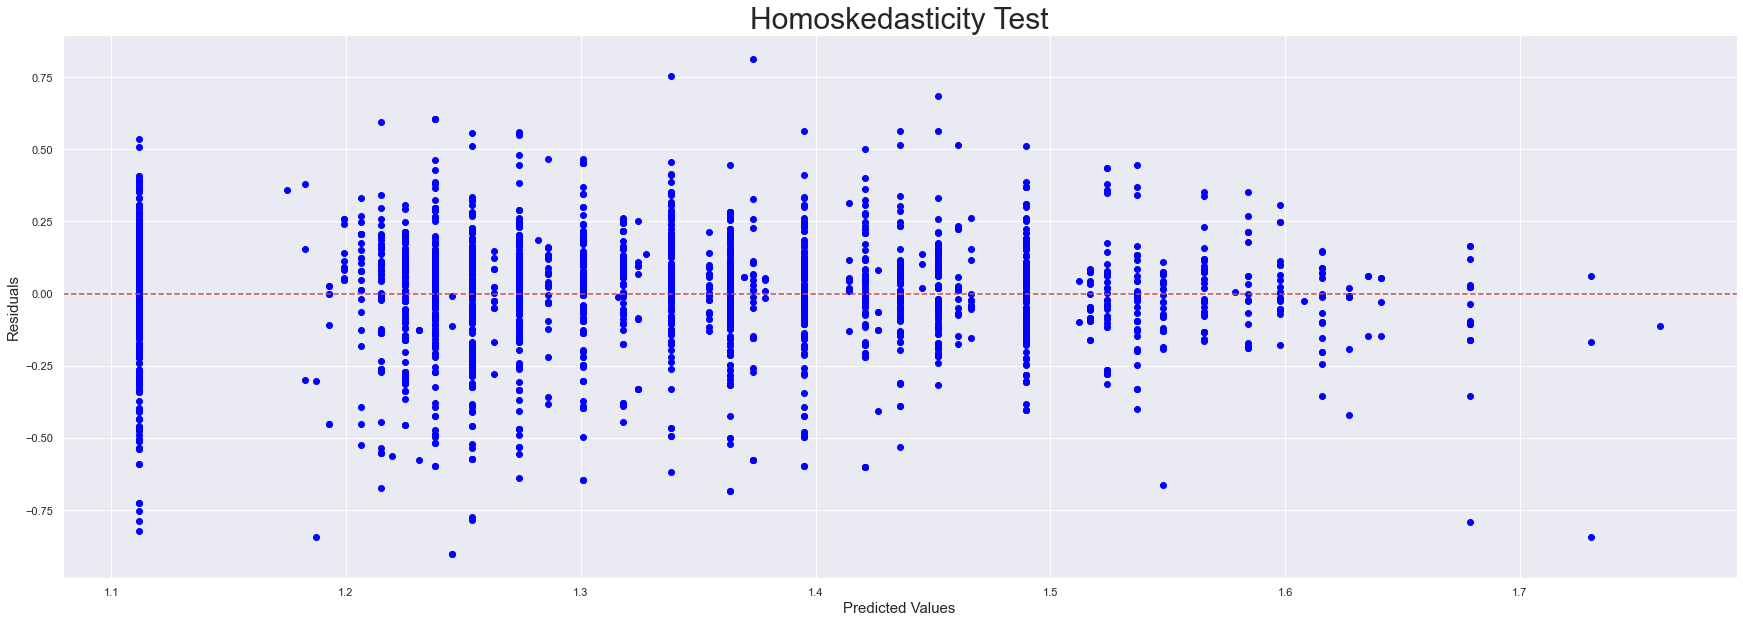

In [872]:
fig, ax = plt.subplots(figsize = (30,10))
ax.scatter(fittedvals_fe15_OLS, residuals_fe15_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [883]:
fe15_OLS_dataset = pd.concat([panel_data, residuals_fe15_OLS], axis=1).reset_index()
fe15_OLS_dataset = fe15_OLS_dataset.drop(['Date'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(panel_data['PCT_WOMEN_ON_BOARD']).fillna(0)
white_test_results = het_white(fe15_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
#3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(fe15_OLS_dataset.residual,exog)
print(dict(zip(labels, breusch_pagan_test_results)))
## no heteroskedacity
durbin_watson_test_results = durbin_watson(fe15_OLS_dataset['residual']) 
print(durbin_watson_test_results)

{'LM-Stat': 3.7861244302628307, 'LM p-val': 0.15060990204734898, 'F-Stat': 1.8935255038516468, 'F p-val': 0.15070809425939932}
{'LM-Stat': 2.402925510933267, 'LM p-val': 0.12110857571409211, 'F-Stat': 2.4032267932555675, 'F p-val': 0.12118371515839156}
1.0457467559588944


In [875]:
exog_vars = ['PCT_WOMEN_ON_BOARD','BOARD_SIZE','CEO_DUALITY','BOARD_AVERAGE_TENURE','BOARD_MEETING_ATTENDANCE_PCT','LN_BOARD_AVERAGE_AGE',
              'LN_BOARD_MEETINGS_PER_YR','LN_CHIEF_EXECUTIVE_OFFICER_AGE','LN_CHIEF_EXECUTIVE_OFFICER_TENURE','INDEPENDENT_DIRECTORS']
exog = sm.tools.tools.add_constant(panel_data[exog_vars])
endog = panel_data['LN_SOCIAL_DISCLOSURE_SCORE']
mod = PanelOLS(endog, exog,entity_effects = True)
PanelOLS16_res = mod.fit(cov_type='clustered', cluster_entity = True)
# Store values for checking homoskedasticity graphically
fittedvals_fe16_OLS = PanelOLS16_res.predict().fitted_values
residuals_fe16_OLS = PanelOLS16_res.resids

In [876]:
PanelOLS16_res

PanelOLS Estimation Summary                               
========================================================================================
Dep. Variable:     LN_SOCIAL_DISCLOSURE_SCORE   R-squared:                        0.1732
Estimator:                           PanelOLS   R-squared (Between):              0.0492
No. Observations:                        1668   R-squared (Within):               0.1732
Date:                        Mon, Sep 06 2021   R-squared (Overall):              0.0945
Time:                                01:50:46   Log-likelihood                    945.30
Cov. Estimator:                     Clustered                                           
                                                F-statistic:                      29.226
Entities:                                 263   P-value                           0.0000
Avg Obs:                               6.3422   Distribution:                 F(10,1395)
Min Obs:                               1.0000                                           
Max Obs:                               8.0000   F-statistic (robust):             14.165
                                                P-value                           0.0000
Time periods:                              11   Distribution:                 F(10,1395)
Avg Obs:                               151.64                                           
Min Obs:                               1.0000                                           
Max Obs:                               237.00                                           
                                                                                        
                                         Parameter Estimates                                         
=====================================================================================================
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
const                                -1.9834     0.9464    -2.0958     0.0363     -3.8399     -0.1269
PCT_WOMEN_ON_BOARD                    0.0072     0.0009     7.9501     0.0000      0.0054      0.0090
BOARD_SIZE                           -0.0080     0.0113    -0.7071     0.4796     -0.0302      0.0142
CEO_DUALITY                          -0.0646     0.0480    -1.3454     0.1787     -0.1588      0.0296
BOARD_AVERAGE_TENURE                 -0.0045     0.0065    -0.7012     0.4833     -0.0173      0.0082
BOARD_MEETING_ATTENDANCE_PCT         -0.0008     0.0024    -0.3419     0.7325     -0.0056      0.0039
LN_BOARD_AVERAGE_AGE                  1.5243     0.5088     2.9960     0.0028      0.5262      2.5223
LN_BOARD_MEETINGS_PER_YR             -0.0223     0.0462    -0.4835     0.6288     -0.1130      0.0683
LN_CHIEF_EXECUTIVE_OFFICER_AGE        0.3485     0.2810     1.2402     0.2151     -0.2027      0.8997
LN_CHIEF_EXECUTIVE_OFFICER_TENURE    -0.0001     0.0195    -0.0072     0.9943     -0.0384      0.0381
INDEPENDENT_DIRECTORS                 0.0163     0.0109     1.4990     0.1341     -0.0050      0.0377
=====================================================================================================

F-test for Poolability: 16.850
P-value: 0.0000
Distribution: F(262,1395)

Included effects: Entity
PanelEffectsResults, id: 0x1bf5f858ac0

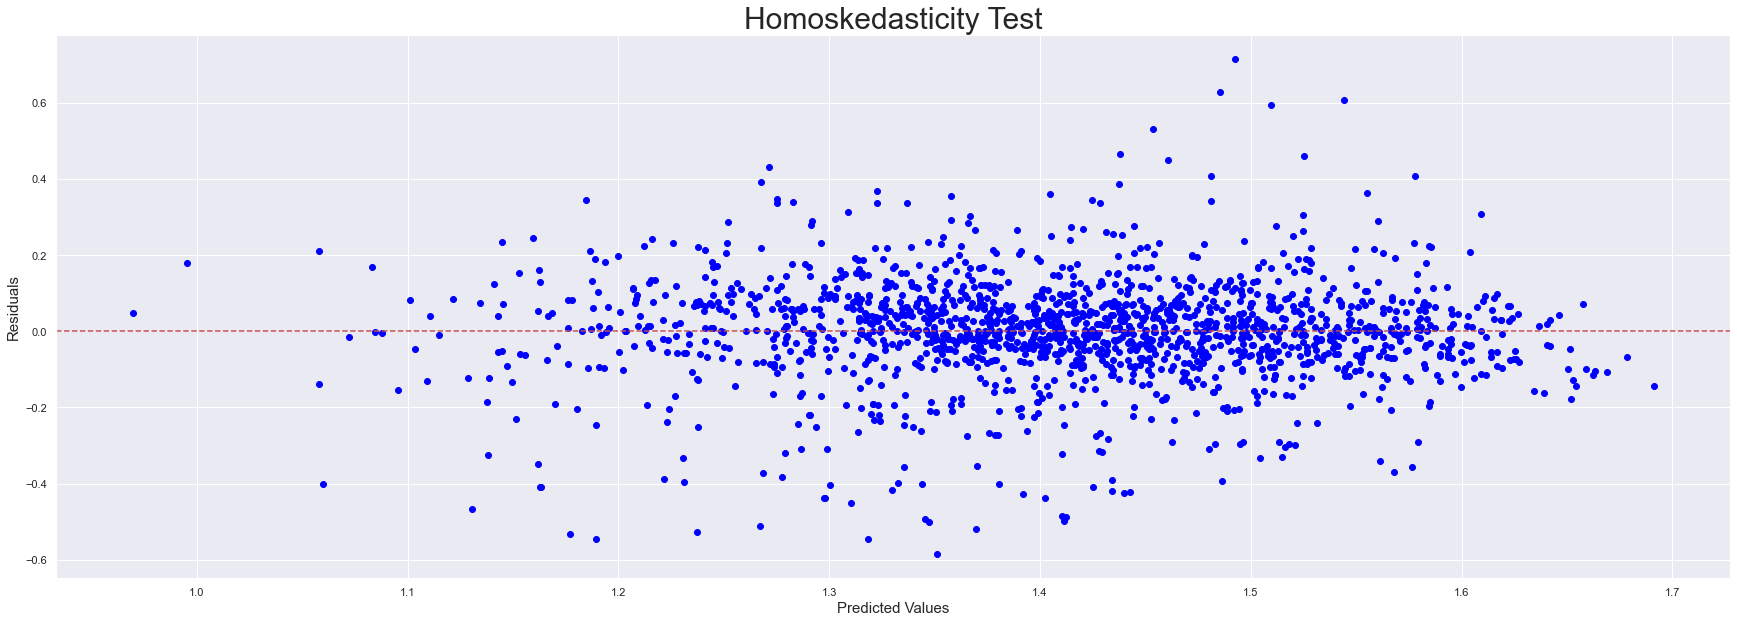

In [877]:
fig, ax = plt.subplots(figsize = (30,10))
ax.scatter(fittedvals_fe16_OLS, residuals_fe16_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [884]:
fe16_OLS_dataset = pd.concat([panel_data, residuals_fe16_OLS], axis=1).reset_index()
fe16_OLS_dataset = fe16_OLS_dataset.drop(['Date'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(panel_data['PCT_WOMEN_ON_BOARD']).fillna(0)
white_test_results = het_white(fe16_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
#3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(fe16_OLS_dataset.residual,exog)
print(dict(zip(labels, breusch_pagan_test_results)))
## no heteroskedacity
durbin_watson_test_results = durbin_watson(fe16_OLS_dataset['residual']) 
print(durbin_watson_test_results)

{'LM-Stat': 2.1633881433937567, 'LM p-val': 0.33902071350051993, 'F-Stat': 1.0814124898384863, 'F p-val': 0.3392395860578197}
{'LM-Stat': 2.162074483073079, 'LM p-val': 0.14145360572876012, 'F-Stat': 2.162183516917391, 'F p-val': 0.14154145776245727}
1.2957667442354799


In [879]:
exog_vars = ['PCT_WOMEN_ON_BOARD','BOARD_SIZE','CEO_DUALITY','BOARD_AVERAGE_TENURE','BOARD_MEETING_ATTENDANCE_PCT','LN_BOARD_AVERAGE_AGE',
              'LN_BOARD_MEETINGS_PER_YR','LN_CHIEF_EXECUTIVE_OFFICER_AGE','LN_CHIEF_EXECUTIVE_OFFICER_TENURE','INDEPENDENT_DIRECTORS'
,'ROE','LN_CUR_MKT_CAP','ROA','D/E']
exog = sm.tools.tools.add_constant(panel_data[exog_vars])
endog = panel_data['LN_SOCIAL_DISCLOSURE_SCORE']
mod = PanelOLS(endog, exog,entity_effects = True)
PanelOLS17_res = mod.fit(cov_type='clustered', cluster_entity = True)
# Store values for checking homoskedasticity graphically
fittedvals_fe17_OLS = PanelOLS17_res.predict().fitted_values
residuals_fe17_OLS = PanelOLS17_res.resids

In [880]:
PanelOLS17_res

PanelOLS Estimation Summary                               
========================================================================================
Dep. Variable:     LN_SOCIAL_DISCLOSURE_SCORE   R-squared:                        0.1739
Estimator:                           PanelOLS   R-squared (Between):              0.0697
No. Observations:                        1668   R-squared (Within):               0.1739
Date:                        Mon, Sep 06 2021   R-squared (Overall):              0.1081
Time:                                01:53:38   Log-likelihood                    946.04
Cov. Estimator:                     Clustered                                           
                                                F-statistic:                      20.923
Entities:                                 263   P-value                           0.0000
Avg Obs:                               6.3422   Distribution:                 F(14,1391)
Min Obs:                               1.0000                                           
Max Obs:                               8.0000   F-statistic (robust):             10.163
                                                P-value                           0.0000
Time periods:                              11   Distribution:                 F(14,1391)
Avg Obs:                               151.64                                           
Min Obs:                               1.0000                                           
Max Obs:                               237.00                                           
                                                                                        
                                         Parameter Estimates                                         
=====================================================================================================
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
const                                -2.0833     0.9473    -2.1992     0.0280     -3.9415     -0.2250
PCT_WOMEN_ON_BOARD                    0.0071     0.0009     7.9597     0.0000      0.0054      0.0089
BOARD_SIZE                           -0.0082     0.0113    -0.7292     0.4660     -0.0304      0.0139
CEO_DUALITY                          -0.0647     0.0483    -1.3377     0.1812     -0.1595      0.0302
BOARD_AVERAGE_TENURE                 -0.0050     0.0064    -0.7761     0.4378     -0.0175      0.0076
BOARD_MEETING_ATTENDANCE_PCT         -0.0008     0.0024    -0.3490     0.7271     -0.0056      0.0039
LN_BOARD_AVERAGE_AGE                  1.5333     0.5122     2.9939     0.0028      0.5287      2.5380
LN_BOARD_MEETINGS_PER_YR             -0.0207     0.0468    -0.4425     0.6582     -0.1126      0.0711
LN_CHIEF_EXECUTIVE_OFFICER_AGE        0.3600     0.2824     1.2749     0.2026     -0.1939      0.9140
LN_CHIEF_EXECUTIVE_OFFICER_TENURE    -0.0009     0.0197    -0.0438     0.9651     -0.0395      0.0378
INDEPENDENT_DIRECTORS                 0.0162     0.0109     1.4822     0.1385     -0.0052      0.0377
ROE                                  -0.0003     0.0017    -0.1601     0.8728     -0.0037      0.0031
LN_CUR_MKT_CAP                        0.0205     0.0348     0.5899     0.5554     -0.0478      0.0889
ROA                                   0.0003     0.0067     0.0480     0.9617     -0.0128      0.0135
D/E                                6.724e-05     0.0002     0.2762     0.7824     -0.0004      0.0005
=====================================================================================================

F-test for Poolability: 16.088
P-value: 0.0000
Distribution: F(262,1391)

Included effects: Entity
PanelEffectsResults, id: 0x1bf64949dc0

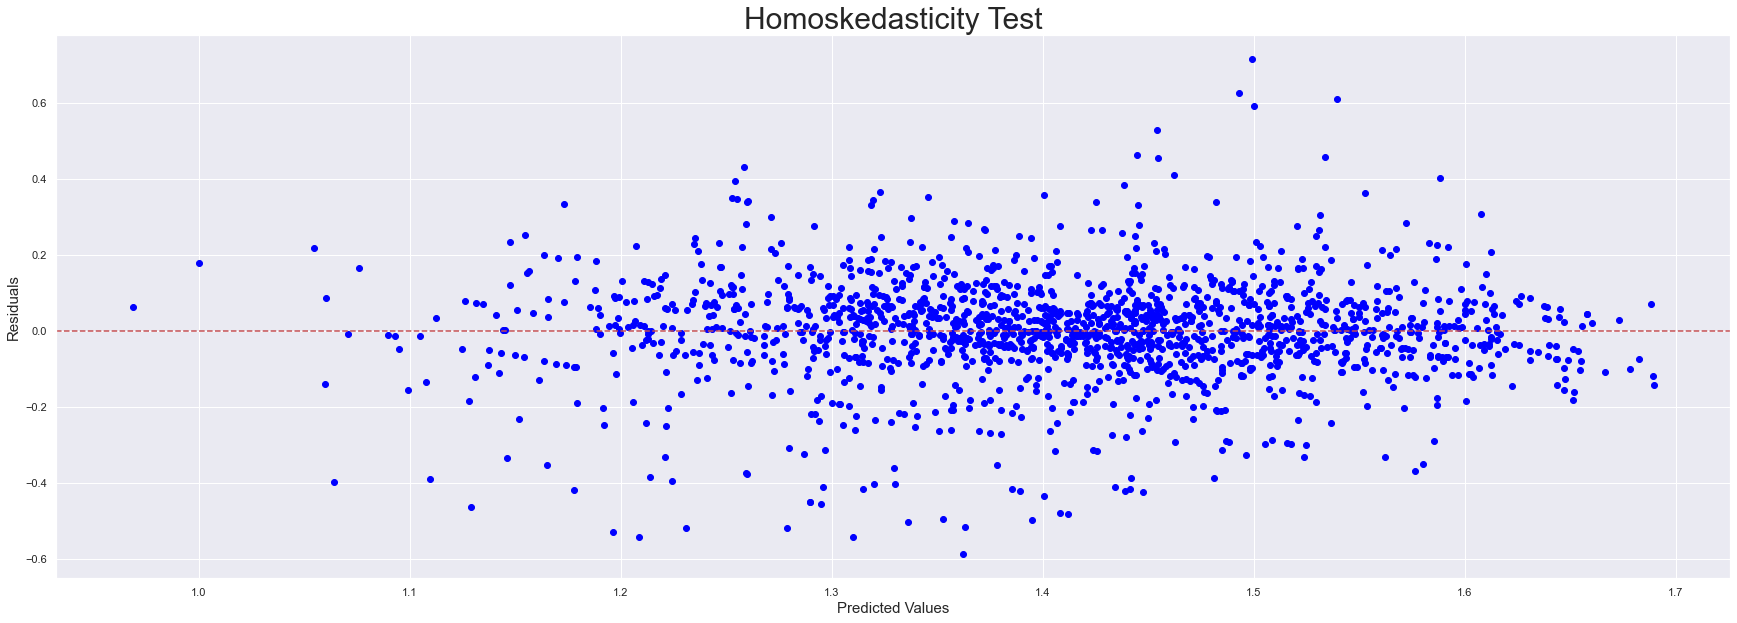

In [881]:
fig, ax = plt.subplots(figsize = (30,10))
ax.scatter(fittedvals_fe17_OLS, residuals_fe17_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [885]:
fe17_OLS_dataset = pd.concat([panel_data, residuals_fe17_OLS], axis=1).reset_index()
fe17_OLS_dataset = fe17_OLS_dataset.drop(['Date'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(panel_data['PCT_WOMEN_ON_BOARD']).fillna(0)
white_test_results = het_white(fe17_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
#3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(fe17_OLS_dataset.residual,exog)
print(dict(zip(labels, breusch_pagan_test_results)))
## no heteroskedacity
durbin_watson_test_results = durbin_watson(fe16_OLS_dataset['residual']) 
print(durbin_watson_test_results)

{'LM-Stat': 2.1621114736176104, 'LM p-val': 0.33923719133505337, 'F-Stat': 1.0807738917906655, 'F p-val': 0.33945614720101397}
{'LM-Stat': 2.1619101701550445, 'LM p-val': 0.14146873033342686, 'F-Stat': 2.162019085176335, 'F p-val': 0.14155659133303852}
1.2957667442354799
